# 가설 1. 코로나 발생 이후 1인분 주문이 늘었을 것이다 (15000원 이하)
- 1인분 주문의 범위를 결제금액이 15000원 이하의 주문건으로 가정하였다.
- 코로나 발생 이후 외식이나 타인과 식사를 못하는 경우가 많아졌으므로 1인분 주문이 늘었을 것 이라고 생각하였다.

### delivery data
- GOODS_AMOUNT : 배달상품금액

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('font', size=12)

In [3]:
dlvy = pd.read_csv('./KT_data_20200717/delivery.csv')

In [4]:
# 6월 데이터 부족으로 6월 데이터 삭제하기
np.where(dlvy.PROCESS_DT == '2020-06-01')

(array([4681952, 4681953, 4681954, ..., 4708900, 4708901, 4708902],
       dtype=int64),)

In [5]:
dlvy = dlvy[:4681951]

In [6]:
# 시계열 데이터로 바꿔주기
dlvy['date'] = pd.to_datetime(dlvy['PROCESS_DT'])

In [7]:
# column 명 바꿔주기
dlvy.rename(columns={'GOODS_AMOUNT':'결제금액'}, inplace=True)

In [8]:
# 결제금액 15000원 이하 추출
alone = dlvy[dlvy['결제금액'] <= 15000].reset_index(drop=True)

In [9]:
alone_size = pd.DataFrame(alone.groupby('date').size(), columns = ['size'])
alone_size_week = alone_size.resample('W').sum()
alone_size_month = alone_size.resample('M').sum()

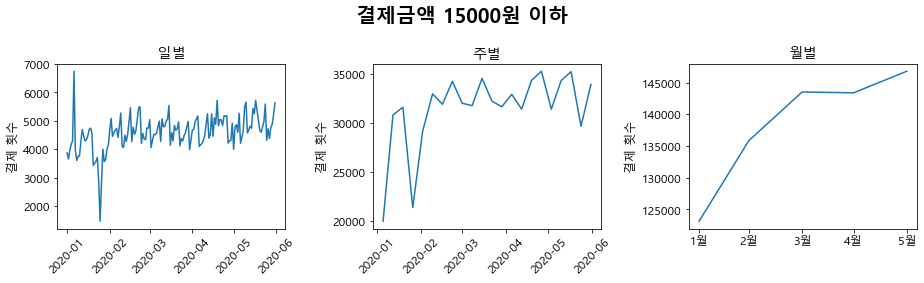

In [10]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(alone_size)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(alone_size_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(alone_size_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(alone_size_month.index,values)

plt.suptitle('결제금액 15000원 이하',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [11]:
not_alone = dlvy[dlvy['결제금액'] > 15000].reset_index(drop=True)

not_alone_size = pd.DataFrame(not_alone.groupby('date').size(), columns = ['size'])
not_alone_size_week = not_alone_size.resample('W').sum()
not_alone_size_month = not_alone_size.resample('M').sum()

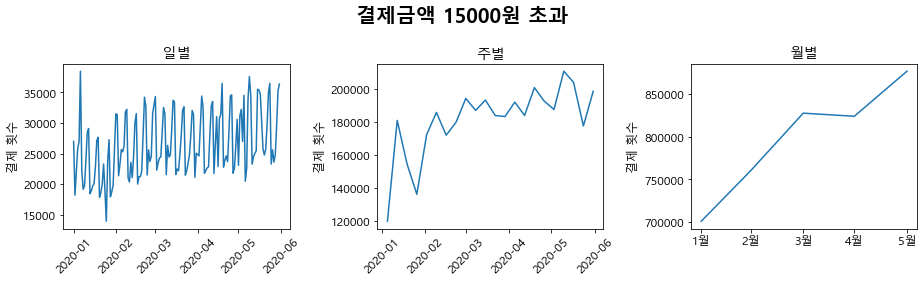

In [12]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(not_alone_size)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(not_alone_size_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(not_alone_size_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.suptitle('결제금액 15000원 초과',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [13]:
many = dlvy[dlvy['결제금액'] >= 50000].reset_index(drop=True)

many = pd.DataFrame(many.groupby('date').size(), columns = ['size'])
many_week = many.resample('W').sum()
many_month = many.resample('M').sum()

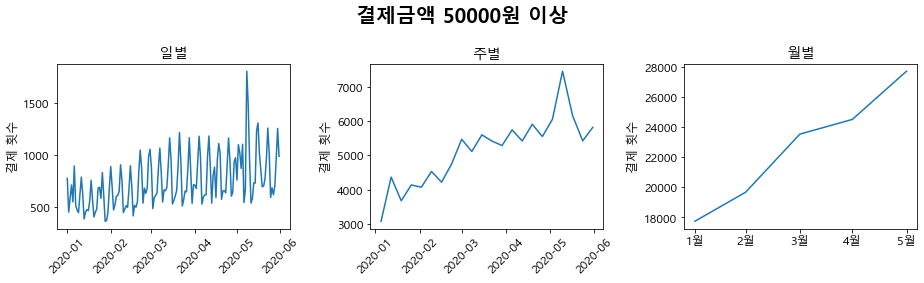

In [14]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(many)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(many_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(many_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.suptitle('결제금액 50000원 이상',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [15]:
total = pd.DataFrame(dlvy.groupby('date').size(), columns = ['size'])
total_week = total.resample('W').sum()
total_month = total.resample('M').sum()

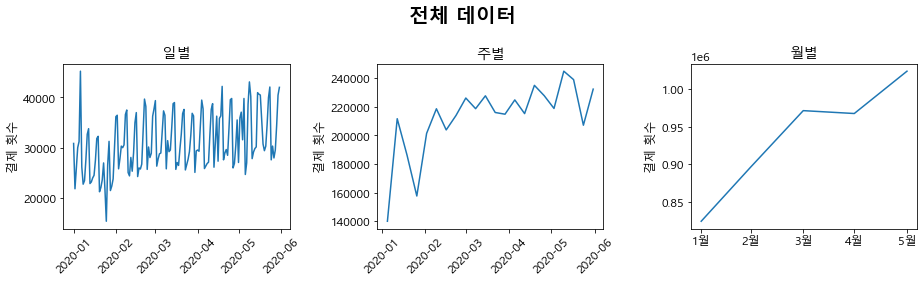

In [16]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(total)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(total_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(total_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(total_month.index,values)

plt.suptitle('전체 데이터',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

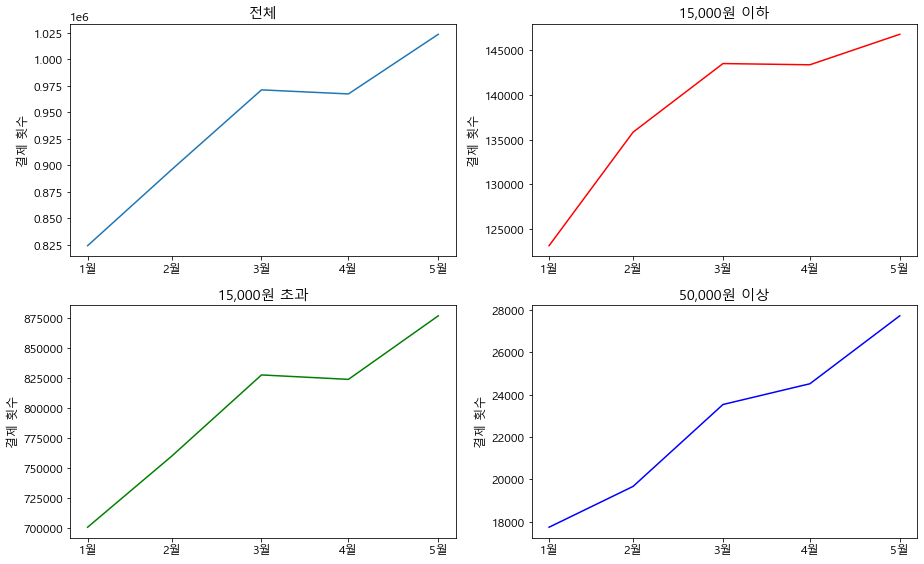

In [17]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(total_month)
plt.title('전체')
plt.ylabel('결제 횟수')
plt.xticks(total_month.index,values)

plt.subplot(2,2,2)
plt.plot(alone_size_month, c='r')
plt.title('15,000원 이하')
plt.ylabel('결제 횟수')
plt.xticks(alone_size_month.index,values)

plt.subplot(2,2,3)
plt.plot(not_alone_size_month, c='g')
plt.title('15,000원 초과')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.subplot(2,2,4)
plt.plot(many_month, c='b')
plt.title('50,000원 이상')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.tight_layout()
plt.show()

- 전체적으로 모두 증가추세를 보였다.
- 50,000원 이상의 주문 건수가 뚜렷한 증가추세를 보여준다.

## 주문 건수의 증가를 확인하기에는 전체 주문건수에서 15,000원 이하의 데이터가 차지하는 비율을 확인 해보는 것이 좋을 것이라고 생각했다.

In [18]:
rate = alone_size / total * 100

In [19]:
rate_month = alone_size_month / total_month * 100

In [20]:
rate_week = alone_size_week / total_week * 100

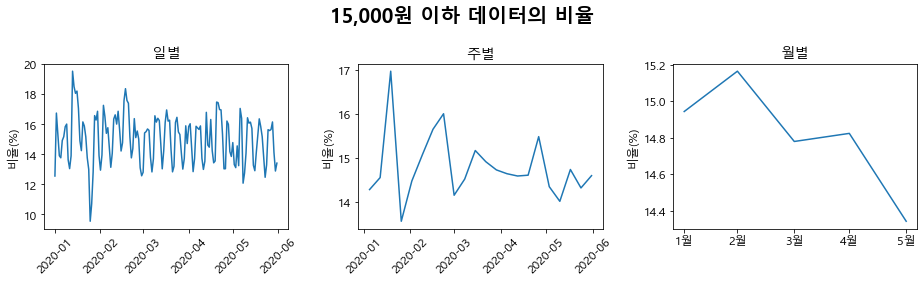

In [21]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(rate)
plt.title('일별')
plt.ylabel('비율(%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(rate_week)
plt.title('주별')
plt.ylabel('비율(%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(rate_month)
plt.title('월별')
plt.ylabel('비율(%)')
plt.xticks(total_month.index,values)

plt.suptitle('15,000원 이하 데이터의 비율',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

- 비율로 확인해 보았을 때, 오히려 15,000원 이하의 주문 건은 줄어든 것으로 확인되었다.

## 정리
- 코로나 이후 배달 주문의 양이 늘었을 것이다. 그 중 타인과의 식사가 많이 줄어들었을 것이고 따라서 1인분의 양으로 시켜먹는 건수가 많아졌을 것이라고 생각하였다.
- 15,000원 이하의 데이터만 뽑아보았을 때는 전체 데이터와 마찬가지로 증가하는 추세를 보였다. 하지만 오히려 뚜렷한 증가추세를 보인 것은 50,000원 이상의 데이터였다.
- 비율로 확인해 보았을 때는 15,000원 이하의 주문 건은 줄어들었다.
- 코로나 이후 1인분의 주문건수는 늘어났지만, 전체 비율에서는 오히려 줄어들었다.
- 코로나 이후 외식이 줄어들고 가족단위로 주문을 시키는 양이 늘었다고 생각해 볼 수 있었다.
___

# 가설 2. 코로나 발생 이후 국내 골프산업이 성장할 것이다
- 해외 출국 금지로 인해 국내 골프장의 수요가 증가할 것이다.
- 마스크의 착용 유무가 운동에 미치는 영향이 미미하기 때문에 마스크의 영향을 많이 받는 다른 운동을 하기 보다 골프를 더 많이 할 것이다.

In [22]:
card = pd.read_csv('./KT_data_20200717/card_20200717.csv')

In [23]:
card['date'] = pd.to_datetime(card['receipt_dttm'].astype(str))
del card['receipt_dttm']
card.rename(columns={'mrhst_induty_cl_nm':'항목','selng_cascnt' : '건수', 'salamt' : '금액', 'mrhst_induty_cl_code' : '업종코드'}, inplace=True)

In [24]:
# 데이터기 적은 6월 데이터 삭제하기
np.where(card.date == '2020-06-01')

(array([3333538, 3333539, 3333540, ..., 3353973, 3353974, 3353975],
       dtype=int64),)

In [25]:
card = card[:3333538]

In [26]:
# 건수의 음수 값 삭제
card = card.drop(np.where(card['건수'] < 0)[0].tolist(),0).reset_index(drop=True)

In [27]:
code2 = card[card['업종코드']//1000 == 2]

In [28]:
code2['항목'].unique()  # 골프경기장, 골프연습장, 스크린골프, 골프 용품

array(['기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품', '화   원', '애완 동물', '영화관',
       '스크린골프', '골프연습장', '골프 용품', '민예공예품', '악 기 점', '화방표구점', '수 족 관',
       '티켓', '화   랑', '문화취미기타', '테니스 장', '볼 링 장', '수 영 장', '종합레져타운',
       '골프경기장', '카지노', '스 키 장', '골동품 점', '피아노대리점', '총포류판매'], dtype=object)

In [29]:
golf_count = code2.groupby(['date','항목'])['건수'].sum().unstack()[['골프경기장','골프연습장','스크린골프','골프 용품']].fillna(0)
golf_money = code2.groupby(['date','항목'])['금액'].sum().unstack()[['골프경기장','골프연습장','스크린골프','골프 용품']].fillna(0)

In [30]:
golf_count_week = golf_count.resample('W').sum()
golf_money_week = golf_money.resample('W').sum()

In [31]:
golf_count_month = golf_count.resample('M').sum()
golf_money_month = golf_money.resample('M').sum()

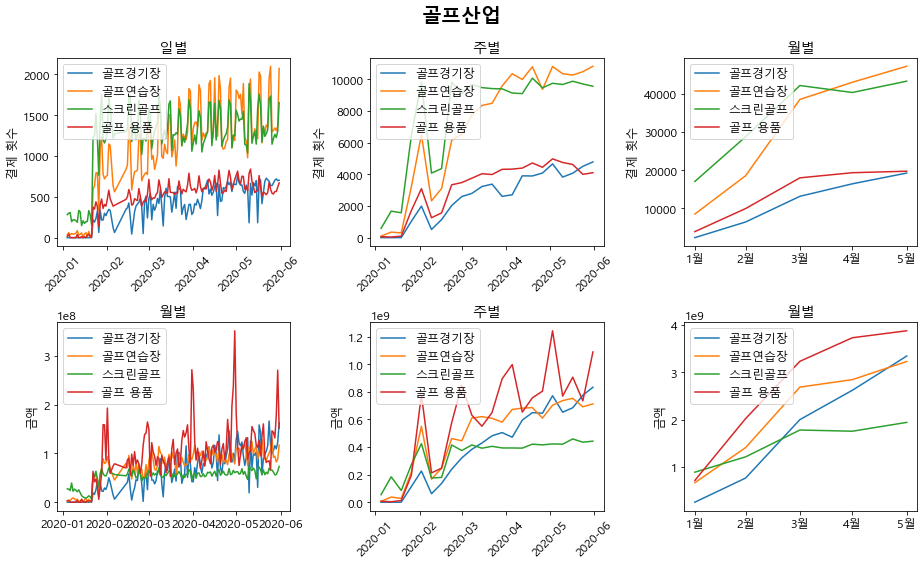

In [32]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8) 

plt.subplot(2, 3, 1)                
plt.plot(golf_count)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)
plt.legend(golf_count.columns)

plt.subplot(2, 3, 2)                
plt.plot(golf_count_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)
plt.legend(golf_count_week.columns)

plt.subplot(2, 3, 3)                
plt.plot(golf_count_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)
plt.legend(golf_count_month.columns)

plt.subplot(2, 3, 4)                
plt.plot(golf_money)
plt.title('월별')
plt.ylabel('금액')
plt.legend(golf_money.columns)

plt.subplot(2, 3, 5)                
plt.plot(golf_money_week)
plt.title('주별')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(golf_money_week.columns)

plt.subplot(2, 3, 6)                
plt.plot(golf_money_month)
plt.title('월별')
plt.ylabel('금액')
plt.xticks(golf_money_month.index,values)
plt.legend(golf_money_month.columns)

plt.suptitle('골프산업',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

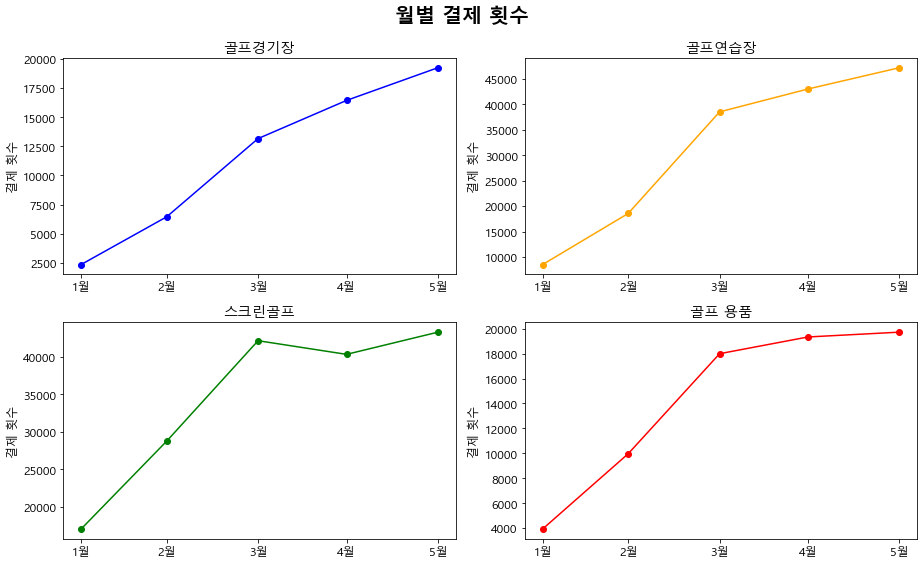

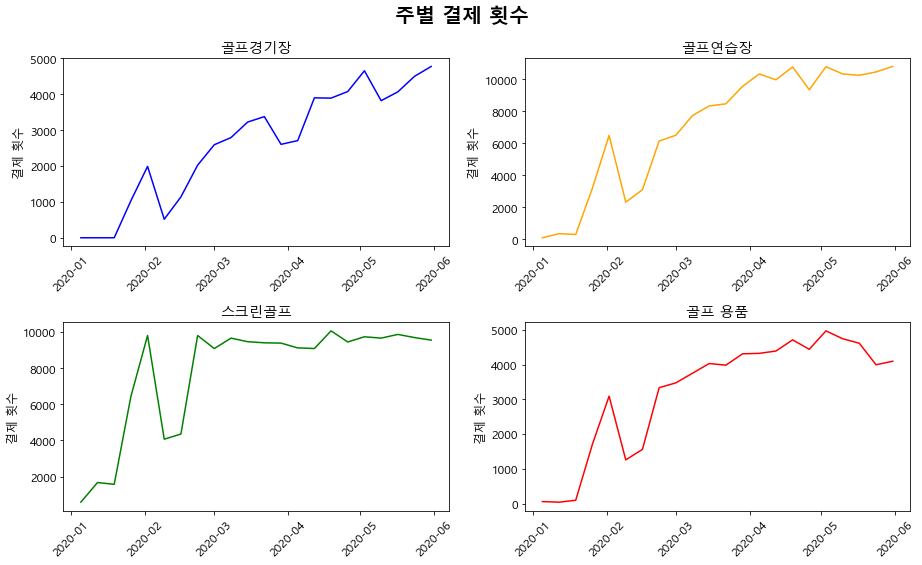

In [33]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_count_month['골프경기장'], c='b', marker = "o")
plt.title('골프경기장')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,2)
plt.plot(golf_count_month['골프연습장'], c='orange', marker = "o")
plt.title('골프연습장')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,3)
plt.plot(golf_count_month['스크린골프'], c='g', marker = "o")
plt.title('스크린골프')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,4)
plt.plot(golf_count_month['골프 용품'], c='r', marker = "o")
plt.title('골프 용품')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.suptitle('월별 결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

#########
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_count_week['골프경기장'], c='b')
plt.title('골프경기장')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(golf_count_week['골프연습장'], c='orange')
plt.title('골프연습장')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(golf_count_week['스크린골프'], c='g')
plt.title('스크린골프')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(golf_count_week['골프 용품'], c='r')
plt.title('골프 용품')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.suptitle('주별 결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

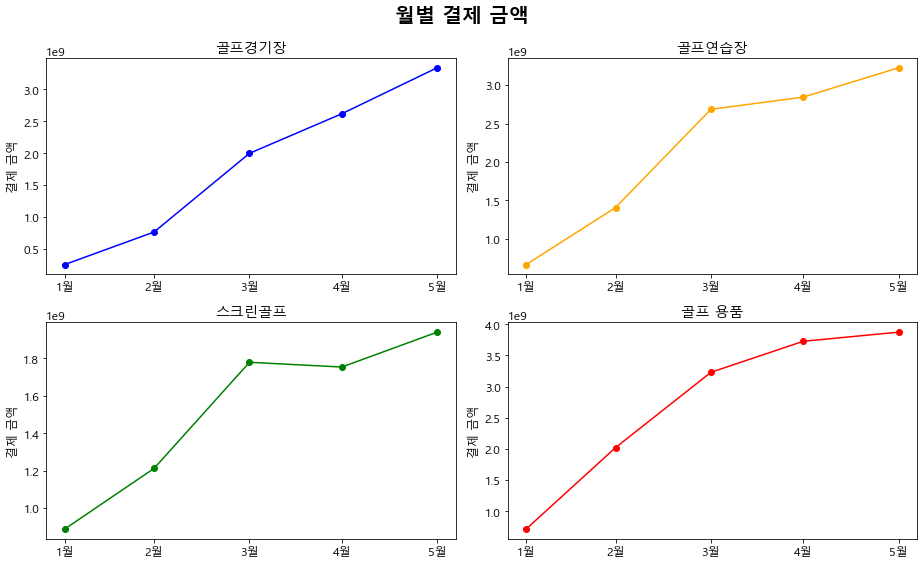

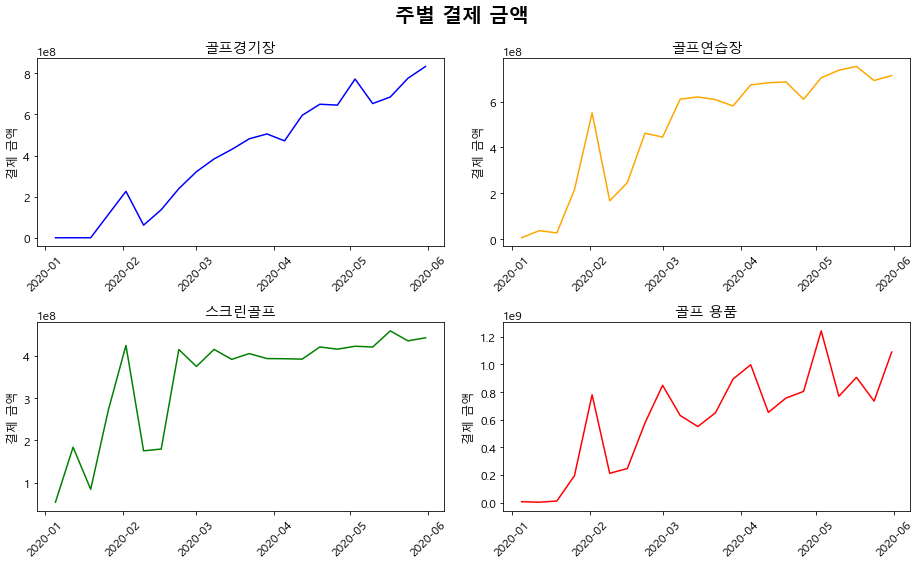

In [34]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_money_month['골프경기장'], c='b', marker = "o")
plt.title('골프경기장')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,2)
plt.plot(golf_money_month['골프연습장'], c='orange', marker = "o")
plt.title('골프연습장')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,3)
plt.plot(golf_money_month['스크린골프'], c='g', marker = "o")
plt.title('스크린골프')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,4)
plt.plot(golf_money_month['골프 용품'], c='r', marker = "o")
plt.title('골프 용품')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.suptitle('월별 결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

############
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_money_week['골프경기장'], c='b')
plt.title('골프경기장')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(golf_money_week['골프연습장'], c='orange')
plt.title('골프연습장')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(golf_money_week['스크린골프'], c='g')
plt.title('스크린골프')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(golf_money_week['골프 용품'], c='r')
plt.title('골프 용품')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.suptitle('주별 결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

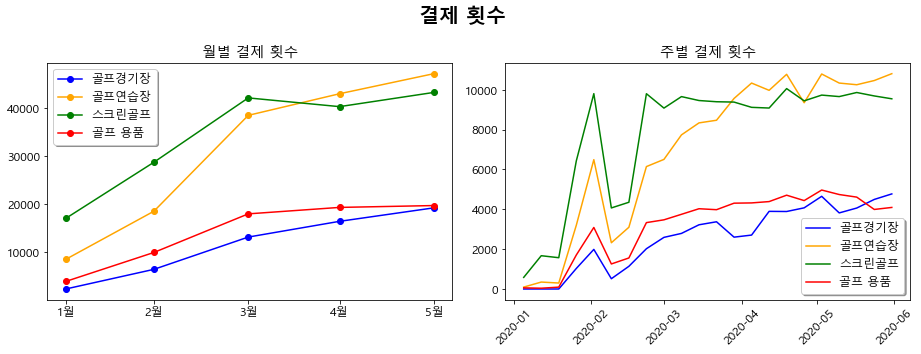

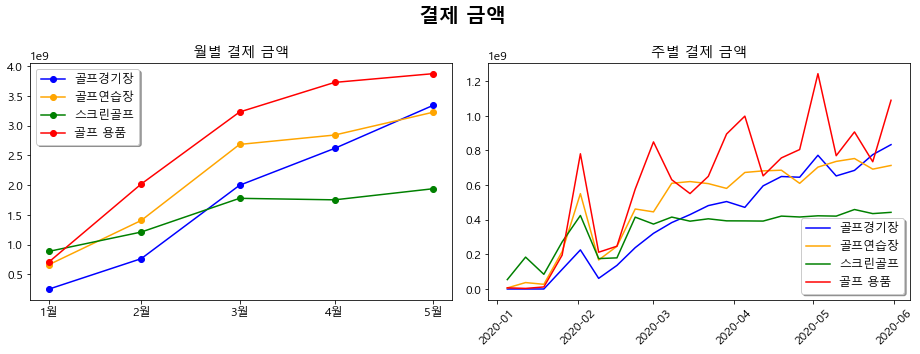

In [35]:
# 결제 횟수
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,5)

plt.subplot(1,2,1)
plt.plot(golf_count_month['골프경기장'], c='b', label='골프경기장', marker = "o")
plt.plot(golf_count_month['골프연습장'], c='orange',label='골프연습장', marker = "o")
plt.plot(golf_count_month['스크린골프'], c='g',label='스크린골프', marker = "o")
plt.plot(golf_count_month['골프 용품'], c='r',label='골프 용품', marker = "o")
plt.xticks(golf_count_month.index,values)
plt.legend(shadow=True, fancybox=True, loc="upper left")
plt.title('월별 결제 횟수')

plt.subplot(1,2,2)
plt.plot(golf_count_week['골프경기장'], c='b', label='골프경기장')
plt.plot(golf_count_week['골프연습장'], c='orange',label='골프연습장')
plt.plot(golf_count_week['스크린골프'], c='g',label='스크린골프')
plt.plot(golf_count_week['골프 용품'], c='r',label='골프 용품')
plt.xticks(rotation=45)
plt.legend(shadow=True, fancybox=True, loc="lower right")
plt.title('주별 결제 횟수')
           
plt.suptitle('결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

# 결제 금액
fig = plt.figure()
fig.set_size_inches(13,5)

plt.subplot(1,2,1)
plt.plot(golf_money_month['골프경기장'], c='b', label='골프경기장', marker = "o")
plt.plot(golf_money_month['골프연습장'], c='orange',label='골프연습장', marker = "o")
plt.plot(golf_money_month['스크린골프'], c='g',label='스크린골프', marker = "o")
plt.plot(golf_money_month['골프 용품'], c='r',label='골프 용품', marker = "o")
plt.xticks(golf_money_month.index,values)
plt.legend(shadow=True, fancybox=True, loc="upper left")
plt.title('월별 결제 금액')

plt.subplot(1,2,2)
plt.plot(golf_money_week['골프경기장'], c='b', label='골프경기장')
plt.plot(golf_money_week['골프연습장'], c='orange',label='골프연습장')
plt.plot(golf_money_week['스크린골프'], c='g',label='스크린골프')
plt.plot(golf_money_week['골프 용품'], c='r',label='골프 용품')
plt.xticks(rotation=45)
plt.legend(shadow=True, fancybox=True, loc="lower right")
plt.title('주별 결제 금액')
           
plt.suptitle('결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

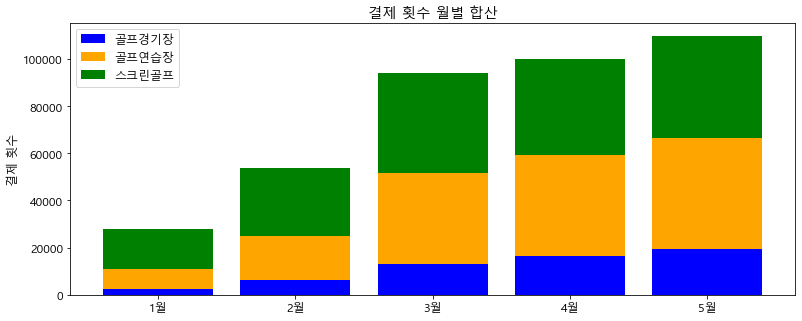

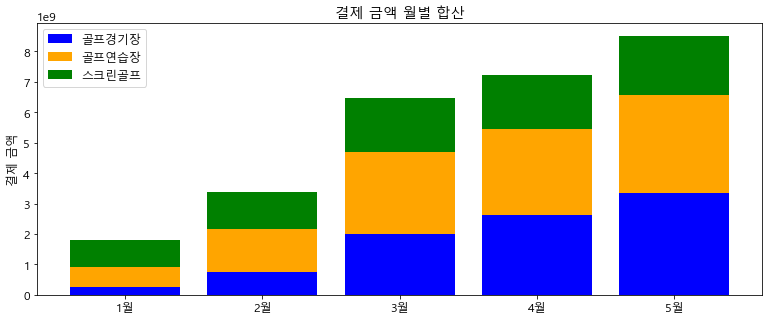

In [36]:
data = golf_count_month.drop('골프 용품', axis=1).values
values = ["1월","2월","3월","4월","5월"]

color_list = ['b', 'orange', 'g']
data_label = ["골프경기장","골프연습장","스크린골프"]
X = np.arange(data.shape[0])

fig = plt.figure()
fig.set_size_inches(13,5)

for i in range(3):
    plt.bar(X, data[:,i], bottom = np.sum(data[:,:i], axis=1), color = color_list[i], label=data_label[i])
plt.xticks([0, 1, 2, 3, 4], values)
plt.legend()
plt.ylabel('결제 횟수')
plt.title('결제 횟수 월별 합산')
plt.show()

############
data = golf_money_month.drop('골프 용품', axis=1).values
values = ["1월","2월","3월","4월","5월"]

color_list = ['b', 'orange', 'g']
data_label = ["골프경기장","골프연습장","스크린골프"]
X = np.arange(data.shape[0])

fig = plt.figure()
fig.set_size_inches(13,5)

for i in range(3):
    plt.bar(X, data[:,i], bottom = np.sum(data[:,:i], axis=1), color = color_list[i], label=data_label[i])
plt.xticks([0, 1, 2, 3, 4], values)
plt.legend()
plt.ylabel('결제 금액')
plt.title('결제 금액 월별 합산')
plt.show()

- 코로나 이후 국내 골프산업은 전체적으로 증가한 것으로 보인다.
- 4개의 분야 모두 증가한 것을 알 수 있다.
- 골프경기장, 골프연습장, 스크린골프의 분야를 결제 금액에서 보았을 때, 1월에는 스크린골프 > 골프연습장 > 골프경기장 순으로 결제 금액이 높았으나, 5월이 되어서는 순서가 반전되어 골프경기장 > 골프연습장 > 스크린골프 순으로 결제 금액이 높아졌다.
- 해외로 나갈 수 없는 상황에서 골프경기를 하기위해 국내의 골프경기장을 찾는 사람들이 많아졌다는 것을 알 수 있다.

# 가설
1.   코로나 발생 이후, 연령별 카테고리의 cgi 평균수치의 감소가 보일것으로 추측.
2.   소극적인 소비행태로 인해 cgi 지수 감소도 기록될 것으로 추측.

In [37]:
time = pd.read_csv("./KT_data_20200717/COVID_19/Time.csv")
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [39]:
index = pd.read_csv("./KT_data_20200717/index.csv")
index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595


In [40]:
# date별 코로나 확진자 수

Text(0.5, 1.0, 'Confirmed by date')

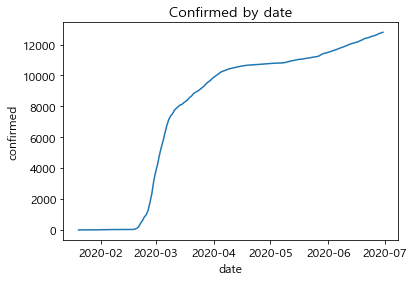

In [41]:
time.date = pd.to_datetime(time.date)
sns.lineplot(x="date", y="confirmed", data = time)
plt.title("Confirmed by date")

2019년을 코로나 이전, 2020년을 코로나 이후로 설정함


In [42]:
#2019년의 데이터만 뽑기 위해 마지막 달인 12월까지 몇행인지 도출
np.where(index.period == 201912)

(array([82608, 82609, 82610, ..., 90125, 90126, 90127], dtype=int64),)

In [43]:
#다시, year이라는 컬럼을 추가해 년만 표시되게 하기

In [44]:
period_list = index.period.astype(str).tolist()

In [45]:
year_list = []
for i in period_list:
    year_list.append(i[0:4])

In [46]:
index["year"] = year_list
index

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [47]:
#코로나 이전(2019년) 데이터만 뽑기 위해 조건 설정

In [48]:
last_year = index[index["year"] == '2019']
last_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
90123,201912,화장품,화장품,all,all,서울,all,72.688013,2019
90124,201912,화장품,화장품,all,all,서울,강동구,111.745516,2019
90125,201912,화장품,화장품,all,all,서울,서대문구,24.279394,2019
90126,201912,화장품,화장품,all,all,서울,서초구,25.715134,2019


In [49]:
#코로나 이후(2020년) 데이터

In [50]:
now_year = index[index["year"] == '2020']
now_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
90128,202001,건강/의료용품,건강관리용품,20,F,서울,all,101.080460,2020
90129,202001,건강/의료용품,건강관리용품,20,F,서울,강동구,142.598266,2020
90130,202001,건강/의료용품,건강관리용품,20,F,서울,광진구,92.484593,2020
90131,202001,건강/의료용품,건강관리용품,20,F,서울,구로구,162.756403,2020
90132,202001,건강/의료용품,건강관리용품,20,F,서울,양천구,77.568793,2020
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [51]:
# 2019년의 연령대별 품목별 cgi의 평균값

In [52]:
last_mean = last_year.groupby(['year', 'age', 'catl']).mean()
last_mean = last_mean.drop(columns = 'period')
last_mean

cgi
year age catl               
2019 20  건강/의료용품  129.885245
         식품       118.586497
         일용품      125.029549
         화장품      120.923962
     30  건강/의료용품   95.776843
         식품       101.027994
         일용품       99.908279
         화장품       93.591992
     40  건강/의료용품  104.186269
         식품        99.451845
         일용품       96.973864
         화장품       88.120565
     50  건강/의료용품  104.197599
         식품       101.345769
         일용품       92.956185
         화장품       86.100039
     60  건강/의료용품  113.988335
         식품       102.282403
         일용품      100.047142
         화장품       92.799079
     all 건강/의료용품  103.287897
         식품       101.287899
         일용품       95.536417
         화장품       87.280067

In [53]:
#2020년의 연령대별 품목별 cgi의 평균값

In [54]:
now_mean = now_year.groupby(['year', 'age', 'catl']).mean()
now_mean = now_mean.drop(columns = 'period')
now_mean

cgi
year age catl               
2020 20  건강/의료용품  125.643626
         식품       112.201102
         일용품      104.349345
         화장품       94.520504
     30  건강/의료용품   85.074590
         식품        87.849004
         일용품       70.823055
         화장품       87.529506
     40  건강/의료용품   91.254463
         식품        88.175043
         일용품       79.965584
         화장품       65.652442
     50  건강/의료용품   95.223442
         식품        91.623447
         일용품       76.642391
         화장품       70.240234
     60  건강/의료용품   93.147133
         식품        91.330089
         일용품       86.947310
         화장품       79.629638
     all 건강/의료용품   91.544952
         식품        89.828966
         일용품       78.400660
         화장품       72.365893

In [55]:
#2019년의 연령대별 품목별 cgi평균의 시각화

In [56]:
last_mean1 = pd.pivot_table(
    last_mean,
    index = "age",
    columns = "catl",
    values = "cgi",
    aggfunc = "mean"
)
last_mean1

catl,건강/의료용품,식품,일용품,화장품
age,,,,
20,129.885245,118.586497,125.029549,120.923962
30,95.776843,101.027994,99.908279,93.591992
40,104.186269,99.451845,96.973864,88.120565
50,104.197599,101.345769,92.956185,86.100039
60,113.988335,102.282403,100.047142,92.799079
all,103.287897,101.287899,95.536417,87.280067


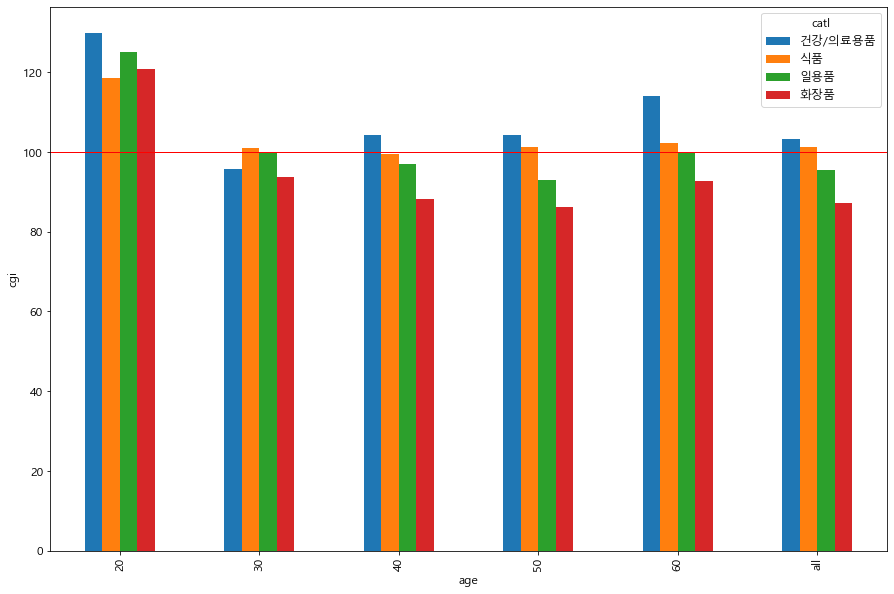

In [57]:
ax = last_mean1.plot.bar()
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("age")
ax.set_ylabel("cgi")
plt.axhline(y=100, color='r', linewidth=1)
plt.show()

In [58]:
#2020년의 연령대별 품목별 cgi의 시각화

In [59]:
now_mean1 = pd.pivot_table(
    now_mean,
    index = "age",
    columns = "catl",
    values = "cgi",
    aggfunc = "mean"
)
now_mean1

catl,건강/의료용품,식품,일용품,화장품
age,,,,
20,125.643626,112.201102,104.349345,94.520504
30,85.074590,87.849004,70.823055,87.529506
40,91.254463,88.175043,79.965584,65.652442
50,95.223442,91.623447,76.642391,70.240234
60,93.147133,91.330089,86.947310,79.629638
all,91.544952,89.828966,78.400660,72.365893


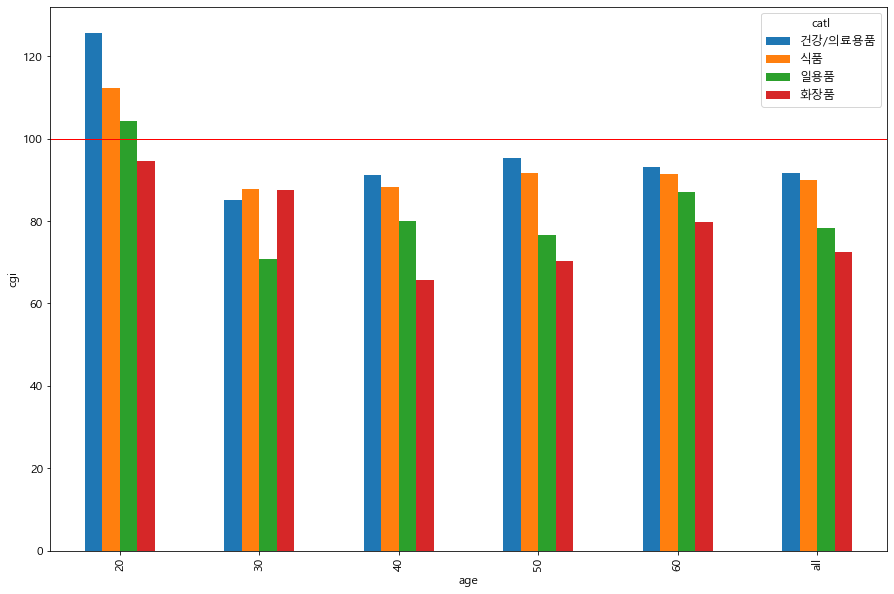

In [60]:
ax = now_mean1.plot.bar()
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("age")
ax.set_ylabel("cgi")
plt.axhline(y=100, color='r', linewidth=1)
plt.show()

In [61]:
#연령별로 나눠서 보기로 결정

In [62]:
last_mean20 = last_mean1.iloc[[0],:]
now_mean20 = now_mean1.iloc[[0],:]
result20 = pd.concat([last_mean20, now_mean20])

last_mean30 = last_mean1.iloc[[1],:]
now_mean30 = now_mean1.iloc[[1],:]
result30 = pd.concat([last_mean30, now_mean30])

last_mean40 = last_mean1.iloc[[2],:]
now_mean40 = now_mean1.iloc[[2],:]
result40 = pd.concat([last_mean40, now_mean40])

last_mean50 = last_mean1.iloc[[3],:]
now_mean50 = now_mean1.iloc[[3],:]
result50 = pd.concat([last_mean50, now_mean50])

last_mean60 = last_mean1.iloc[[4],:]
now_mean60 = now_mean1.iloc[[4],:]
result60 = pd.concat([last_mean60, now_mean60])


In [63]:
# 20대 cgi 비교

(0.0, 140.0)

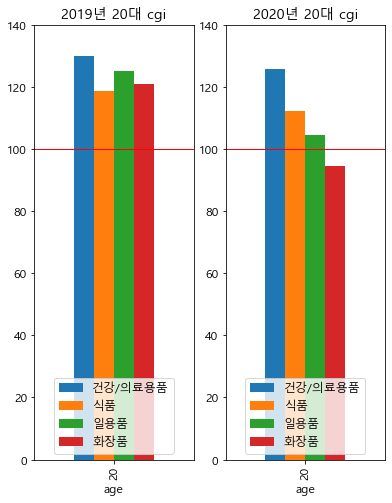

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)


axes[0].set_title("2019년 20대 cgi")
axes[1].set_title("2020년 20대 cgi")
last_mean20.plot(ax=axes[0], kind= 'bar')
now_mean20.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.1)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,140)
axes[1].set_ylim(0,140)

In [65]:
## 화장품의 매출이 확연히 감소한 것으로 사료됨.

In [66]:
#30대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

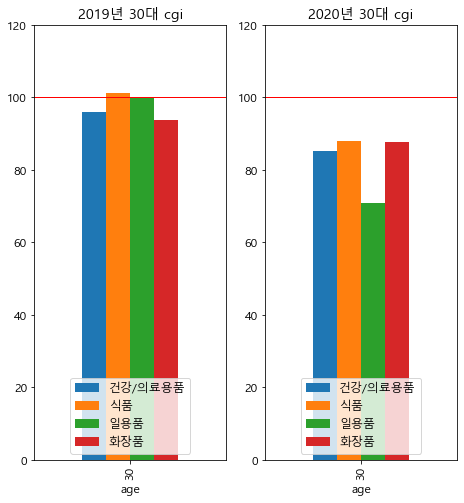

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 30대 cgi")
axes[1].set_title("2020년 30대 cgi")
axes[0].legend(loc = "lower center")
last_mean30.plot(ax=axes[0], kind= 'bar')
now_mean30.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [68]:
## 모든 품목의 매출이 일제히 줄었으며, 특히 일용품의 매출이 눈에 띄게 감소함.

In [69]:
#40대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

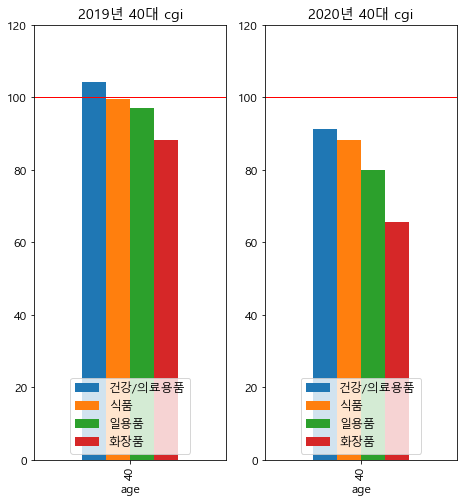

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 40대 cgi")
axes[1].set_title("2020년 40대 cgi")
axes[0].legend(loc = "lower center")
last_mean40.plot(ax=axes[0], kind= 'bar')
now_mean40.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [71]:
## 모든 품목의 매출이 하락함.

In [72]:
#50대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

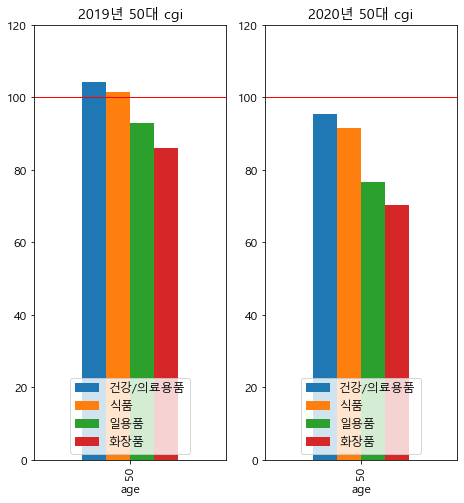

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 50대 cgi")
axes[1].set_title("2020년 50대 cgi")
axes[0].legend(loc = "lower center")
last_mean50.plot(ax=axes[0], kind= 'bar')
now_mean50.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [74]:
##모든 품목의 매출이 하락함.

In [75]:
#60대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

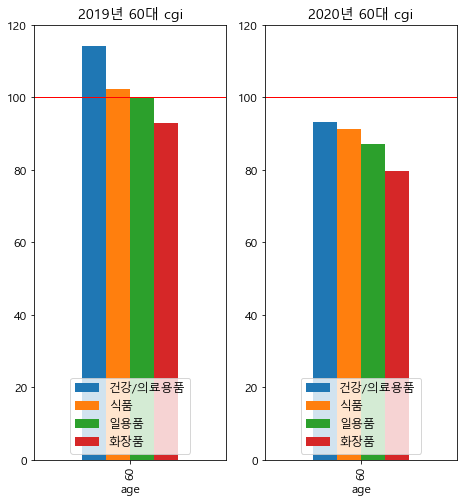

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 60대 cgi")
axes[1].set_title("2020년 60대 cgi")
axes[0].legend(loc = "lower center")
last_mean60.plot(ax=axes[0], kind= 'bar')
now_mean60.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [77]:
## 모든 품목의 매출이 하락함.

2018년 대비 코로나 이후 cgi 지수는 일제히 감소했지만 특정 품목에 대해서 눈에띄게 감소한 점은 특징지을 수 없음.

# 가설 1: 코로나 이후 배달량이 늘어 배달완료시간이 오래 걸릴 것이다.

In [78]:
# import pandas as pd
# import numpy as np
# from pandas import Series, DataFrame
# import datetime
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# import os
# os.name == 'nt'

필요한 csv 파일 불러오기

In [83]:
fpopl = pd.read_csv('./KT_data_20200717/fpopl.csv')
delivery = pd.read_csv('./KT_data_20200717/delivery.csv')
index = pd.read_csv('./KT_data_20200717/index.csv')
confirmed = pd.read_csv('./KT_data_20200717/COVID_19/Time.csv')
trend = pd.read_csv('./KT_data_20200717/SearchTrend.csv')

* fpopl : 행정동별 유동인구 데이터
* delivery : 배달 호출 정보 데이터
* index : 품목 별 소비자수 데이터
* confirmed : 누적 확진자수 데이터
* trend : 네이버에서 검색한 키워드별 퍼센트

In [84]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


delivery 데이터

* SERIAL_NUMBER : 순번
* PROCESS_DT : 처리일시
* DLVR_RQESTER_ID : 배달요청업체 ID
* DLVR_REQUST_STTUS_VALUE : 배달요청상태값( 1:완료, 2:취소, 3:사고, 4:문의)
* DLVR_RCEPT_CMPNY_ID : 배달접수회사 ID
* DLVR_STORE_ID : 배달상점 ID
* DLVR_STORE_INDUTY_NM : 배달상점 업종이름
* DLVR_STORE_LEGALDONG_CODE : 배달상점 주소 법정동코드
* DLVR_STORE_SIDO : 배달상점 주소 법정동 시도명
* DLVR_STORE_SIGUNGU : 배달상점 주소 법정동 시군구명
* DLVR_STORE_DONG : 배달상점 주소 법정동 읍면동명
* DLVR_STORE_RI : 배달상점 주소 법정동 리명
* DLVR_STORE_ADSTRD_CODE : 배달상점 주소 행정동 코드
* DLVR_STORE_RDNMADR_CODE : 배달상점주소 도로명주소 코드
* DLVR_DSTN_LEGALCONG_CODE : 배달목적지 주소 법정동코드
* DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
* DLVR_DSTN_SIGUNGU : 배달목적지 주소 법정동 시군구명
* DLVR_DSTN_DONG : 배달목적지 주소 법정동 읍면동명
* DLVR_DSTN_RI : 배달목적지 주소 법정동 리명
* DLVR_DSTN_ADSTRD_CODE: 배달목적지 주소 행정동 코드
* DLVR_DSTN_RDNMADR_CODE : 배달목적지주소 도로명주소 코드
* DLVR_MAN_ID : 배달기사 ID
* DLVR_AMOUNT : 배달비용
* CALL_RLAY_FEE_AMOUNT : 호출중계수수료금액
* GOODS_AMOUNT : 배달상품금액
* SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
* SETLE_CARD_CN : 결제카드종류
* DLVR_RCEPT_TIME : 배달접수시간
* DLVR_CARALC_TIME : 배달배차시간
* DLVR_COMPT_TIME : 배달완료시간
* DLVR_CANCL_TIME : 배달취소시간

delivery의 'DLVR_RCEPT_TIME', 'DLVR_COMPT_TIME', 'PROCESS_DT'의 type 확인

In [85]:
type(delivery['DLVR_RCEPT_TIME'][0])

str

In [86]:
type(delivery['DLVR_COMPT_TIME'][0])

str

In [87]:
type(delivery['PROCESS_DT'][0])

str

datatime type으로 바꿔주기

In [88]:
delivery['DLVR_RCEPT_TIME'] = pd.to_datetime(delivery['DLVR_RCEPT_TIME'])
delivery['DLVR_COMPT_TIME'] = pd.to_datetime(delivery['DLVR_COMPT_TIME'])
delivery['PROCESS_DT'] = pd.to_datetime(delivery['PROCESS_DT'])

바뀐 type 확인

In [89]:
type(delivery['DLVR_RCEPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [90]:
type(delivery['DLVR_COMPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [91]:
type(delivery['PROCESS_DT'][0])

pandas._libs.tslibs.timestamps.Timestamp

배달시간 계산

In [92]:
time = Series(delivery['DLVR_COMPT_TIME'] - delivery['DLVR_RCEPT_TIME'], dtype = 'object')
time

0          0 days 00:25:48
1          0 days 00:19:30
2          0 days 00:17:33
3          0 days 00:35:14
4          0 days 00:23:54
                ...       
5158319    0 days 00:19:25
5158320    0 days 00:21:05
5158321    0 days 00:19:37
5158322    0 days 00:14:32
5158323    0 days 00:23:32
Length: 5158324, dtype: object

time의 value 값들만 확인

In [93]:
time.values

array([Timedelta('0 days 00:25:48'), Timedelta('0 days 00:19:30'),
       Timedelta('0 days 00:17:33'), ..., Timedelta('0 days 00:19:37'),
       Timedelta('0 days 00:14:32'), Timedelta('0 days 00:23:32')],
      dtype=object)

In [94]:
type(time.values[0])

pandas._libs.tslibs.timedeltas.Timedelta

time을 계산하기 위해 초로 바꾸기

In [95]:
time.values[1].seconds

1170

second 리스트에 값 저장하기

In [96]:
second = []
for i in range(len(time.values)):
  s = time.values[i].seconds
  second.append(s)
second[:10]
len(second)

5158324

In [97]:
second = pd.Series(second)
second[:3] #간단히 보기 위해 3개만 출력

0    1548.0
1    1170.0
2    1053.0
dtype: float64

In [98]:
second = DataFrame(second,columns = ['second'])
second.head()

,second
0,1548.0
1,1170.0
2,1053.0
3,2114.0
4,1434.0


delivery dataframe과 second dataframe 결합.

In [99]:
df = pd.merge(delivery, second, left_index = True, right_index = True)
df.head(10)

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,second
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN,1548.0
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN,1170.0
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1053.0
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN,2114.0
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN,1434.0
5,4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,...,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NaN,1570.0
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN,885.0
7,4577995,2020-01-01,C000238,1,C000238,S0001037,야식,4119010200,경기도,부천시,...,3500,200,28500,2,NaN,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,NaN,1364.0
8,4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,...,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NaN,1912.0
9,4577997,2020-01-01,C000031,1,C000043,S0028777,야식,4115010600,경기도,의정부시,...,3500,300,22000,1,승인:신한카드,2020-01-01 00:10:34,2020-01-01 00:11:10,2020-01-01 00:26:04,NaN,930.0


월별과 주별로 배달완료 시간 확인하기

In [100]:
seoul = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'seoul'])
seoul.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
0,4577985,2020-01-01,경상남도,1548.0,NaN
1,4577986,2020-01-01,서울특별시,1170.0,NaN
2,4577988,2020-01-01,서울특별시,1053.0,NaN
3,4577989,2020-01-01,경기도,2114.0,NaN
4,4577991,2020-01-01,경기도,1434.0,NaN


In [101]:
seoul['seoul'] = seoul['DLVR_DSTN_SIDO'] == '서울특별시'
droped = seoul[seoul['seoul'] == False].index
seoul = seoul.drop(droped)
seoul.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
1,4577986,2020-01-01,서울특별시,1170.0,True
2,4577988,2020-01-01,서울특별시,1053.0,True
6,4577994,2020-01-01,서울특별시,885.0,True
8,4577996,2020-01-01,서울특별시,1912.0,True
22,4578012,2020-01-01,서울특별시,1855.0,True


In [102]:
seoul.index = seoul['PROCESS_DT']
seoul_complete_week = seoul.resample('W').mean()
seoul_complete_month = seoul.resample('M').mean()
seoul_complete_month.head()

,SERIAL_NUMBER,second,seoul
PROCESS_DT,,,
2020-01-31,5.062613e+06,1168.661095,True
2020-02-29,6.083589e+06,1297.683700,True
2020-03-31,7.177649e+06,1180.844187,True
2020-04-30,8.312214e+06,1067.320722,True
2020-05-31,9.495399e+06,1110.682574,True


Text(0.5, 1.0, 'delivery completion time of seoul(Week)')

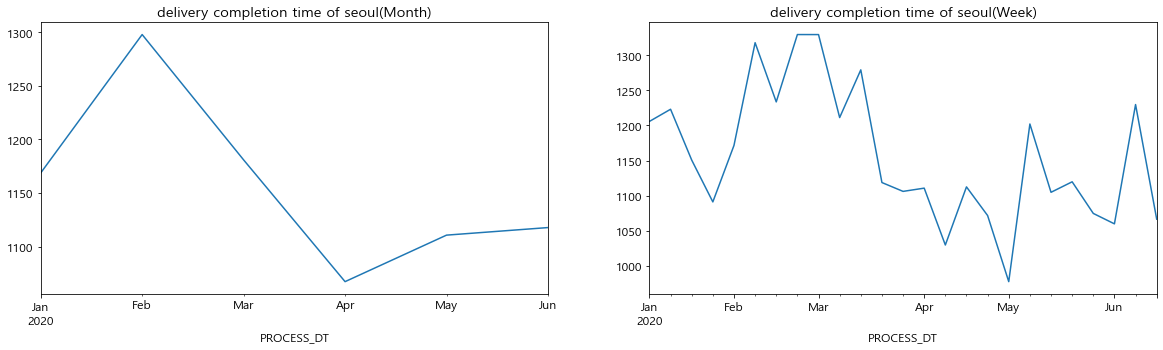

In [103]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
seoul_complete_month['second'].plot(ax = axes[0])
seoul_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of seoul(Month)')
axes[1].set_title('delivery completion time of seoul(Week)')

In [104]:
gyeonggido = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'gyeonggido'])
gyeonggido['gyeonggido'] = gyeonggido['DLVR_DSTN_SIDO'] == '경기도'
droped = gyeonggido[gyeonggido['gyeonggido'] == False].index
gyeonggido = gyeonggido.drop(droped)
gyeonggido.index = gyeonggido['PROCESS_DT']
gyeonggido_complete_week = gyeonggido.resample('W').mean()
gyeonggido_complete_month = gyeonggido.resample('M').mean()
gyeonggido_complete_month.head()

,SERIAL_NUMBER,second,gyeonggido
PROCESS_DT,,,
2020-01-31,5.065194e+06,1112.457422,True
2020-02-29,6.081852e+06,1183.421484,True
2020-03-31,7.176433e+06,1054.899543,True
2020-04-30,8.325291e+06,986.418988,True
2020-05-31,9.498383e+06,1008.635046,True


Text(0.5, 1.0, 'delivery completion time of gyeonggido(Week)')

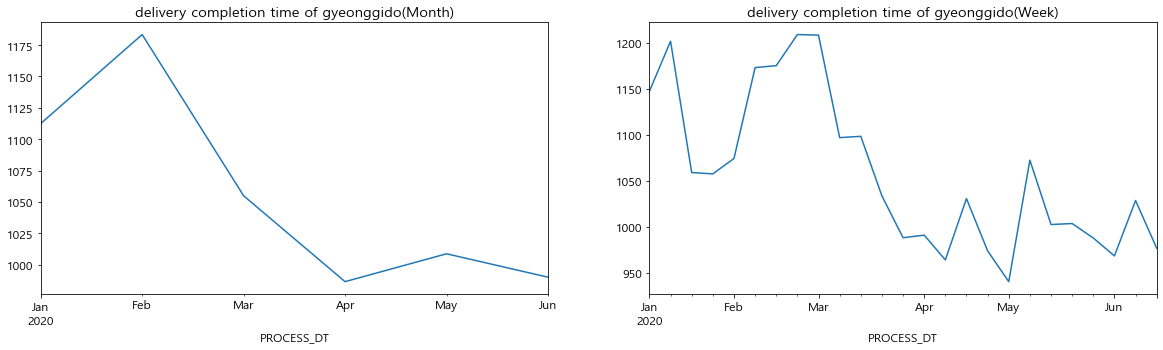

In [105]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
gyeonggido_complete_month['second'].plot(ax = axes[0])
gyeonggido_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of gyeonggido(Month)')
axes[1].set_title('delivery completion time of gyeonggido(Week)')

In [106]:
incheon = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'incheon'])
incheon['incheon'] = incheon['DLVR_DSTN_SIDO'] == '인천광역시'
droped = incheon[incheon['incheon'] == False].index
incheon = incheon.drop(droped)
incheon.index = incheon['PROCESS_DT']
incheon_complete_week = incheon.resample('W').mean()
incheon_complete_month = incheon.resample('M').mean()
incheon_complete_month.head()

,SERIAL_NUMBER,second,incheon
PROCESS_DT,,,
2020-01-31,5.079027e+06,1066.579665,True
2020-02-29,6.074581e+06,1087.745786,True
2020-03-31,7.169542e+06,954.143801,True
2020-04-30,8.322494e+06,914.318156,True
2020-05-31,9.510233e+06,950.589895,True


Text(0.5, 1.0, 'delivery completion time of incheon(Week)')

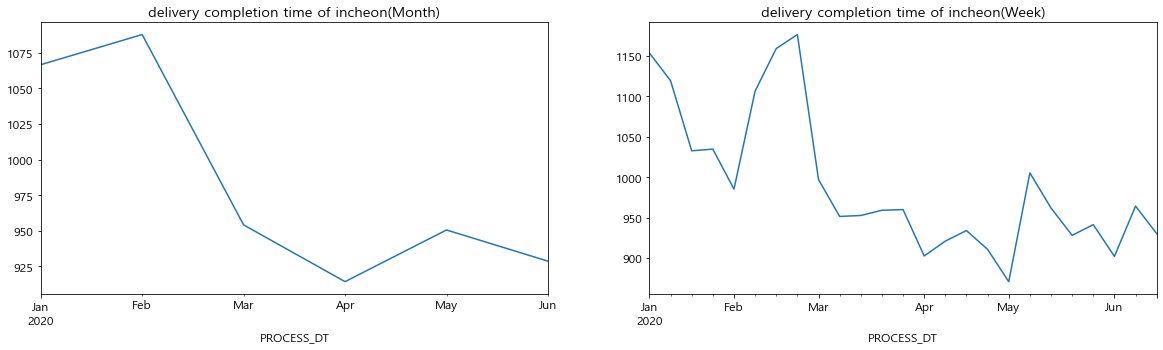

In [107]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
incheon_complete_month['second'].plot(ax = axes[0])
incheon_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of incheon(Month)')
axes[1].set_title('delivery completion time of incheon(Week)')

In [108]:
busan = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'busan'])
busan['busan'] = busan['DLVR_DSTN_SIDO'] == '부산광역시'
droped = busan[busan['busan'] == False].index
busan = busan.drop(droped)
busan.index = busan['PROCESS_DT']
busan_complete_week = busan.resample('W').mean()
busan_complete_month = busan.resample('M').mean()
busan_complete_month.head()

,SERIAL_NUMBER,second,busan
PROCESS_DT,,,
2020-01-31,4.876816e+06,901.961231,True
2020-02-29,6.142427e+06,1558.712815,True
2020-03-31,7.164208e+06,1620.965382,True
2020-04-30,8.328774e+06,993.183480,True
2020-05-31,9.486131e+06,850.677708,True


Text(0.5, 1.0, 'delivery completion time of busan(Week)')

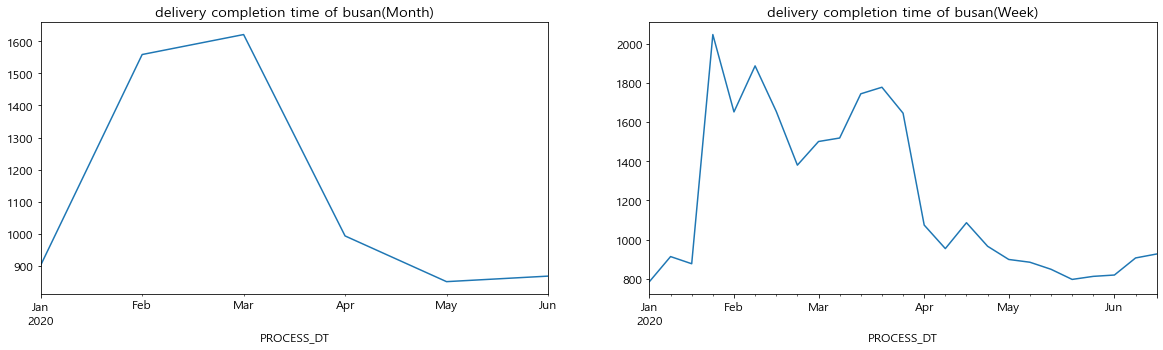

In [109]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
busan_complete_month['second'].plot(ax = axes[0])
busan_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of busan(Month)')
axes[1].set_title('delivery completion time of busan(Week)')

In [110]:
daegu = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'daegu'])
daegu['daegu'] = daegu['DLVR_DSTN_SIDO'] == '대구광역시'
droped = daegu[daegu['daegu'] == False].index
daegu = daegu.drop(droped)
daegu.index = daegu['PROCESS_DT']
daegu_complete_week = daegu.resample('W').mean()
daegu_complete_month = daegu.resample('M').mean()
daegu_complete_month.head()

,SERIAL_NUMBER,second,daegu
PROCESS_DT,,,
2020-01-31,5.057578e+06,839.178693,True
2020-02-29,6.004650e+06,797.606959,True
2020-03-31,7.200702e+06,764.483623,True
2020-04-30,8.316418e+06,799.612316,True
2020-05-31,9.459632e+06,928.826724,True


Text(0.5, 1.0, 'delivery completion time of daegu(Week)')

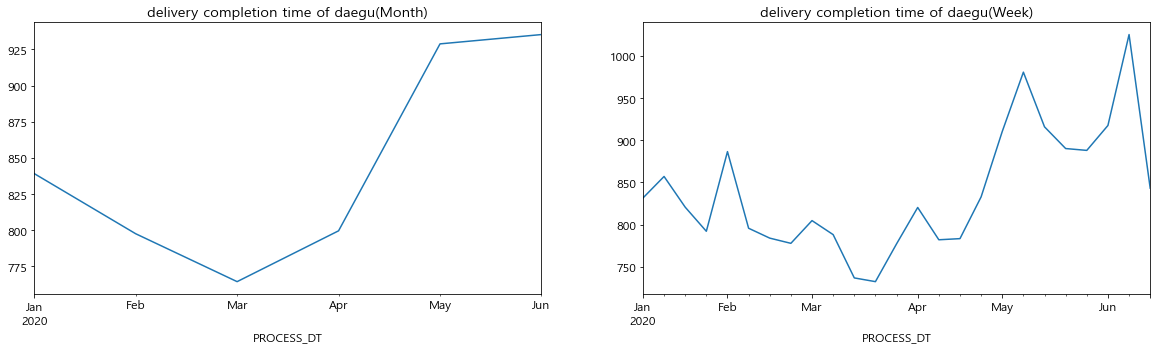

In [111]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
daegu_complete_month['second'].plot(ax = axes[0])
daegu_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of daegu(Month)')
axes[1].set_title('delivery completion time of daegu(Week)')

df dataframe에서 날짜와 지역 기준으로 delivery amount 뽑기

In [112]:
seoul = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'seoul'])
seoul['seoul'] = seoul['DLVR_DSTN_SIDO'] == '서울특별시'
droped = seoul[seoul['seoul'] == False].index
seoul = seoul.drop(droped)
seoul.index = seoul['PROCESS_DT']
seoul_amount_week = seoul.resample('W').count()
seoul_amount_month = seoul.resample('M').count()
seoul_amount_month.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
PROCESS_DT,,,,,
2020-01-31,141525,141525,141525,138986,141525
2020-02-29,150536,150536,150536,147376,150536
2020-03-31,160096,160096,160096,157413,160096
2020-04-30,147864,147864,147864,145843,147864
2020-05-31,150239,150239,150239,147965,150239


Text(0.5, 1.0, 'delivery amount time of seoul(Week)')

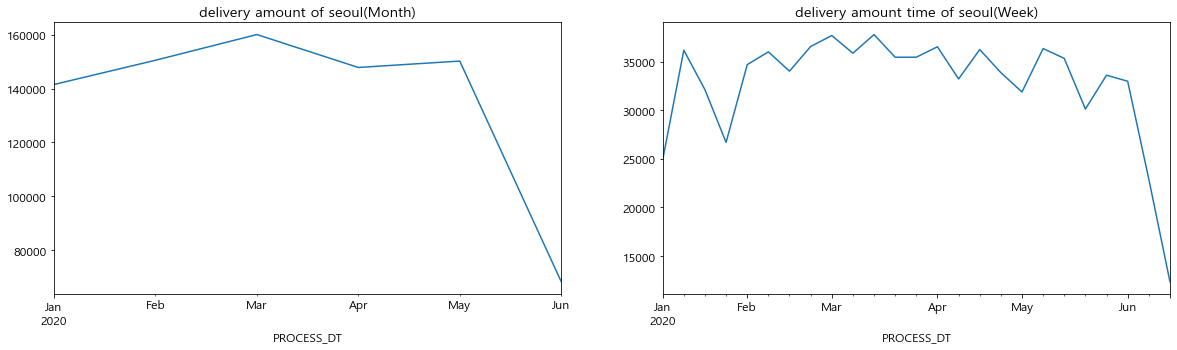

In [113]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
seoul_amount_month['seoul'].plot(ax = axes[0])
seoul_amount_week['seoul'].plot(ax = axes[1])
axes[0].set_title('delivery amount of seoul(Month)')
axes[1].set_title('delivery amount time of seoul(Week)')

In [114]:
incheon = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'incheon'])
incheon['incheon'] = incheon['DLVR_DSTN_SIDO'] == '인천광역시'
droped = incheon[incheon['incheon'] == False].index
incheon = incheon.drop(droped)
incheon.index = incheon['PROCESS_DT']
incheon_amount_week = incheon.resample('W').count()
incheon_amount_month = incheon.resample('M').count()
incheon_amount_month.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,incheon
PROCESS_DT,,,,,
2020-01-31,16060,16060,16060,15540,16060
2020-02-29,13727,13727,13727,13052,13727
2020-03-31,24740,24740,24740,24061,24740
2020-04-30,22147,22147,22147,21502,22147
2020-05-31,21027,21027,21027,20485,21027


Text(0.5, 1.0, 'delivery amount time of incheon(Week)')

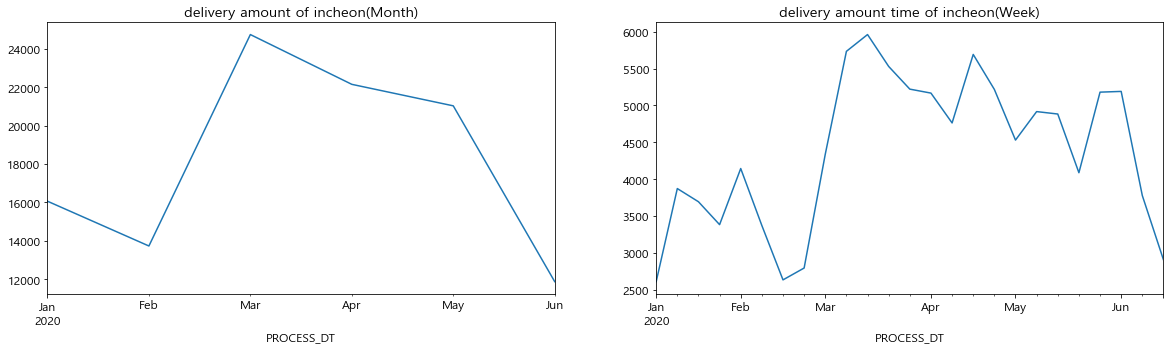

In [115]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
incheon_amount_month['incheon'].plot(ax = axes[0])
incheon_amount_week['incheon'].plot(ax = axes[1])
axes[0].set_title('delivery amount of incheon(Month)')
axes[1].set_title('delivery amount time of incheon(Week)')

Text(0.5, 1.0, 'delivery amount time of gyeonggido(Week)')

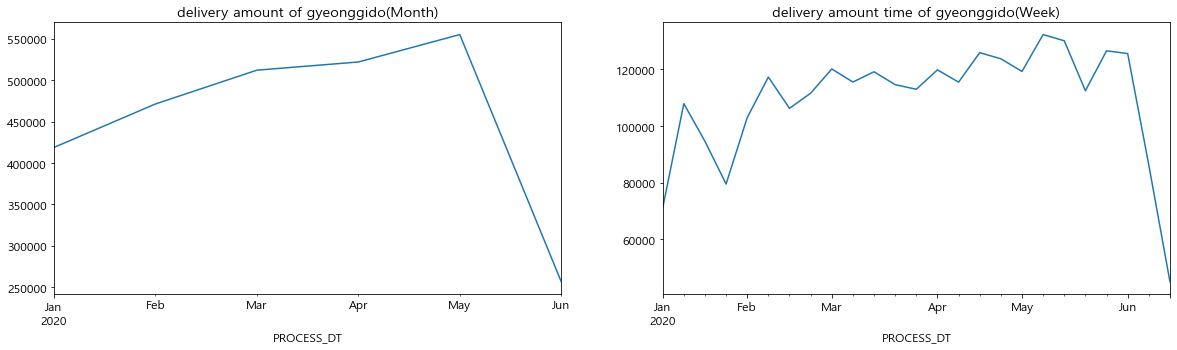

In [116]:
gyeonggido = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'gyeonggido'])
gyeonggido['gyeonggido'] = gyeonggido['DLVR_DSTN_SIDO'] == '경기도'
droped = gyeonggido[gyeonggido['gyeonggido'] == False].index
gyeonggido = gyeonggido.drop(droped)
gyeonggido.index = gyeonggido['PROCESS_DT']
gyeonggido_amount_week = gyeonggido.resample('W').count()
gyeonggido_amount_month = gyeonggido.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
gyeonggido_amount_month['gyeonggido'].plot(ax = axes[0])
gyeonggido_amount_week['gyeonggido'].plot(ax = axes[1])
axes[0].set_title('delivery amount of gyeonggido(Month)')
axes[1].set_title('delivery amount time of gyeonggido(Week)')

Text(0.5, 1.0, 'delivery amount time of busan(Week)')

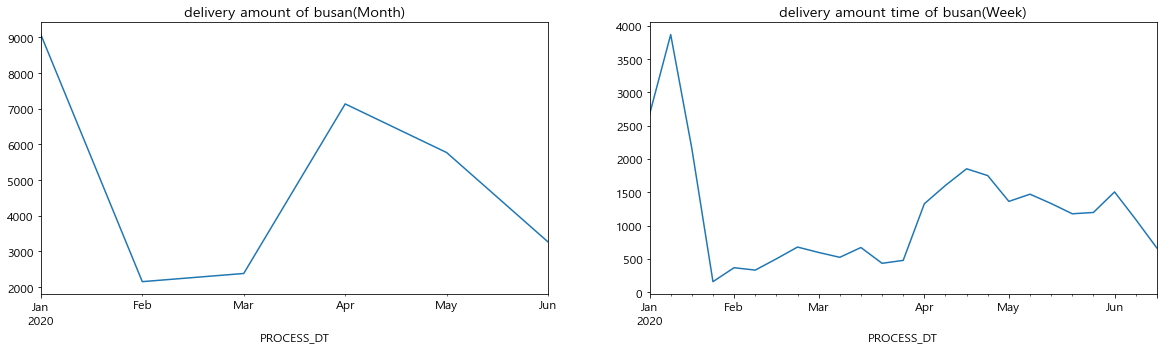

In [117]:
busan = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'busan'])
busan['busan'] = busan['DLVR_DSTN_SIDO'] == '부산광역시'
droped = busan[busan['busan'] == False].index
busan = busan.drop(droped)
busan.index = busan['PROCESS_DT']
busan_amount_week = busan.resample('W').count()
busan_amount_month = busan.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
busan_amount_month['busan'].plot(ax = axes[0])
busan_amount_week['busan'].plot(ax = axes[1])
axes[0].set_title('delivery amount of busan(Month)')
axes[1].set_title('delivery amount time of busan(Week)')

Text(0.5, 1.0, 'delivery amount time of daegu(Week)')

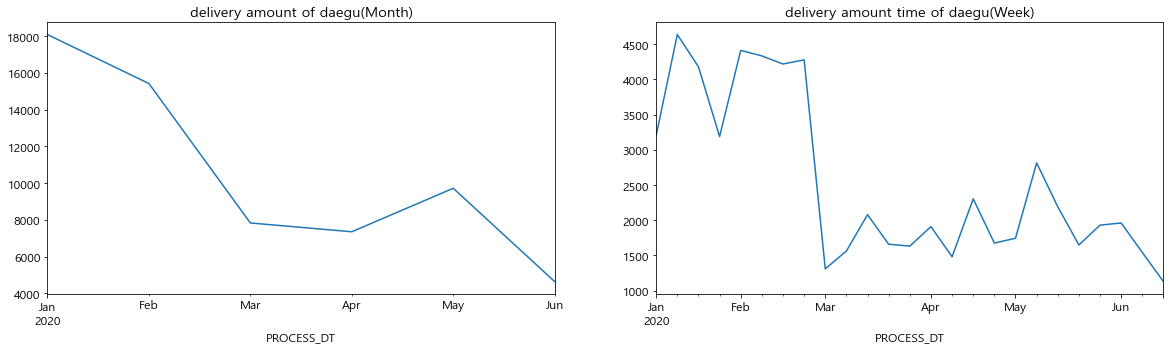

In [118]:
daegu = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'daegu'])
daegu['daegu'] = daegu['DLVR_DSTN_SIDO'] == '대구광역시'
droped = daegu[daegu['daegu'] == False].index
daegu = daegu.drop(droped)
daegu.index = daegu['PROCESS_DT']
daegu_amount_week = daegu.resample('W').count()
daegu_amount_month = daegu.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
daegu_amount_month['daegu'].plot(ax = axes[0])
daegu_amount_week['daegu'].plot(ax = axes[1])
axes[0].set_title('delivery amount of daegu(Month)')
axes[1].set_title('delivery amount time of daegu(Week)')

delivert completion time과 delivery amount의 상관계수(corr) 확인

In [119]:
seoul_corr = pd.merge(seoul_complete_month, seoul_amount_month, left_index = True, right_index = True)
seoul_corr.head()

,SERIAL_NUMBER_x,second_x,seoul_x,SERIAL_NUMBER_y,PROCESS_DT,DLVR_DSTN_SIDO,second_y,seoul_y
PROCESS_DT,,,,,,,,
2020-01-31,5.062613e+06,1168.661095,True,141525,141525,141525,138986,141525
2020-02-29,6.083589e+06,1297.683700,True,150536,150536,150536,147376,150536
2020-03-31,7.177649e+06,1180.844187,True,160096,160096,160096,157413,160096
2020-04-30,8.312214e+06,1067.320722,True,147864,147864,147864,145843,147864
2020-05-31,9.495399e+06,1110.682574,True,150239,150239,150239,147965,150239


In [120]:
seoul_corr['second_x'].corr(seoul_corr['SERIAL_NUMBER_y'])

0.26583213792362415

In [121]:
gyeonggido_corr = pd.merge(gyeonggido_complete_month, gyeonggido_amount_month, left_index = True, right_index = True)
gyeonggido_corr['second_x'].corr(gyeonggido_corr['SERIAL_NUMBER_y'])

0.0858658265583006

In [122]:
busan_corr = pd.merge(busan_complete_month, busan_amount_month, left_index = True, right_index = True)
busan_corr['second_x'].corr(busan_corr['SERIAL_NUMBER_y'])

-0.6903475285050381

In [123]:
daegu_corr = pd.merge(daegu_complete_month, daegu_amount_month, left_index = True, right_index = True)
daegu_corr['second_x'].corr(daegu_corr['SERIAL_NUMBER_y'])

-0.27580932743386866

전국적으로 확인하기

Text(0.5, 1.0, 'delivery completion time of korea(Week)')

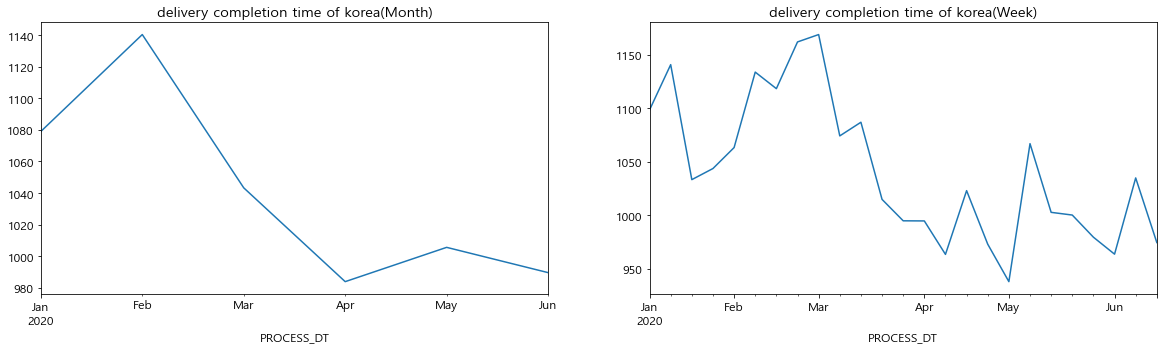

In [124]:
df.index = df['PROCESS_DT']
df_complete_week = df.resample('W').mean()
df_complete_month =df.resample('M').mean()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
df_complete_month['second'].plot(ax = axes[0])
df_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of korea(Month)')
axes[1].set_title('delivery completion time of korea(Week)')

Text(0.5, 1.0, 'delivery amount of korea(Week)')

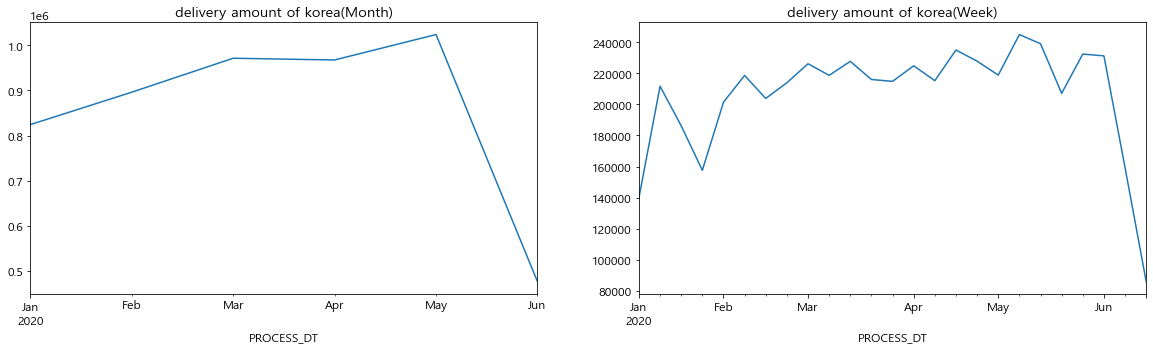

In [125]:
df_amount_week = df.resample('W').count()
df_amount_month =df.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
df_amount_month['SERIAL_NUMBER'].plot(ax = axes[0])
df_amount_week['SERIAL_NUMBER'].plot(ax = axes[1])
axes[0].set_title('delivery amount of korea(Month)')
axes[1].set_title('delivery amount of korea(Week)')

In [126]:
korea_corr = pd.merge(df_complete_month, df_amount_month, left_index = True, right_index = True)
korea_corr['second_x'].corr(korea_corr['SERIAL_NUMBER_y'])

0.16846114645093938

## 결론: 코로나 이후 배달량의 증가와 배달 완료 시간은 뚜렷한 상관관계가 없는 것으로 보인다.

# 가설 2: 정책이 격상될 수록 코로나 키워드 검색량이 많아질 것이다.

kaggle의 searchtrend data pandas로 불러오기

In [127]:
trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


정책 실행날짜와 실행내용이 담겨있는 policy 파일 불러오기

In [128]:
policy = pd.read_csv('./KT_data_20200717/COVID_19/Policy.csv')
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [129]:
policy.values

array([[1, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 1 (Blue)', '2020-01-03', '2020-01-19'],
       [2, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 2 (Yellow)', '2020-01-20', '2020-01-27'],
       [3, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 3 (Orange)', '2020-01-28', '2020-02-22'],
       [4, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 4 (Red)', '2020-02-23', nan],
       [5, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from China', '2020-02-04', nan],
       [6, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Hong Kong', '2020-02-12', nan],
       [7, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Macau', '2020-02-12', nan],
       [8, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Japan', '2020-03-09', nan],
       [9, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Italy', 

In [130]:
trend.iloc[1641]

date           2020-06-29
cold              0.14263
flu               0.04308
pneumonia         0.11254
coronavirus       2.41501
Name: 1641, dtype: object

In [131]:
trend.iloc[1400]

date           2019-11-01
cold              0.12054
flu               0.24426
pneumonia         0.24899
coronavirus       0.00772
Name: 1400, dtype: object

trend dataframe의 날짜 열의 data type 확인

In [132]:
type(trend['date'][0])

str

datatime type으로 바꿔주기

In [133]:
trend['date'] = pd.to_datetime(trend['date'])

true와 false값을 저장할 T/F 열 추가

In [134]:
trend = DataFrame(trend, columns = ['date', 'cold', 'flu', 'pneumonia', 'coronavirus', 'T/F'])
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
0,2016-01-01,0.11663,0.05590,0.15726,0.00736,NaN
1,2016-01-02,0.13372,0.17135,0.20826,0.00890,NaN
2,2016-01-03,0.14917,0.22317,0.19326,0.00845,NaN
3,2016-01-04,0.17463,0.18626,0.29008,0.01145,NaN
4,2016-01-05,0.17226,0.15072,0.24562,0.01381,NaN


trend file에 2016부터의 자료가 있으므로 2019년 11월쯤의 자료만 모아보기

In [135]:
trend['T/F'] = trend.date > pd.to_datetime('2019-10-31')
trend.loc[1400:]

,date,cold,flu,pneumonia,coronavirus,T/F
1400,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
1401,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
1402,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
1403,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
1404,2019-11-05,0.15617,0.27090,0.30717,0.01272,True
...,...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993,True
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139,True
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848,True
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720,True


In [136]:
droped = trend[trend['T/F'] == False].index
trend = trend.drop(droped)
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
1400,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
1401,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
1402,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
1403,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
1404,2019-11-05,0.15617,0.27090,0.30717,0.01272,True


In [137]:
trend.index = trend['date']
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
date,,,,,,
2019-11-01,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
2019-11-02,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
2019-11-03,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
2019-11-04,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
2019-11-05,2019-11-05,0.15617,0.27090,0.30717,0.01272,True


사회적 거리두기 단계에 따른 searchtrend 살펴보기

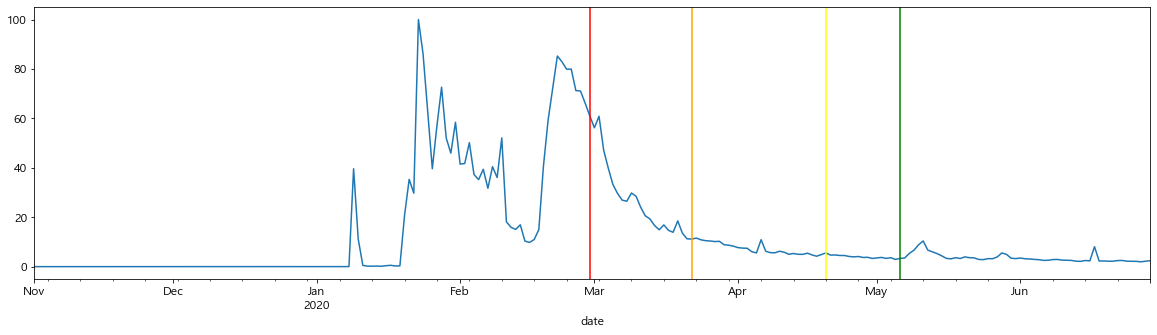

In [138]:
trend['coronavirus'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

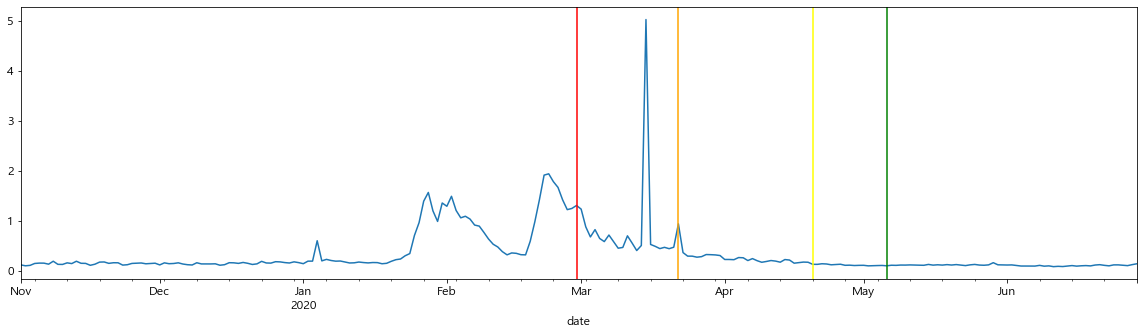

In [139]:
trend['cold'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

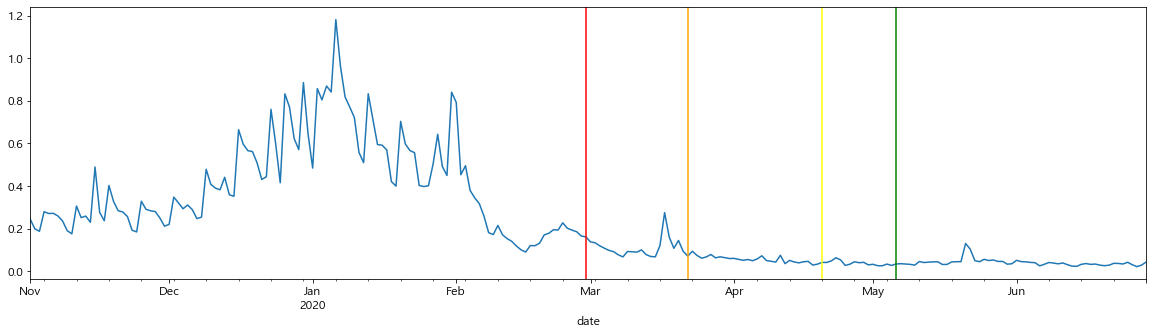

In [140]:
trend['flu'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

전염 경보 레벨에 따른 searchtrend 변화

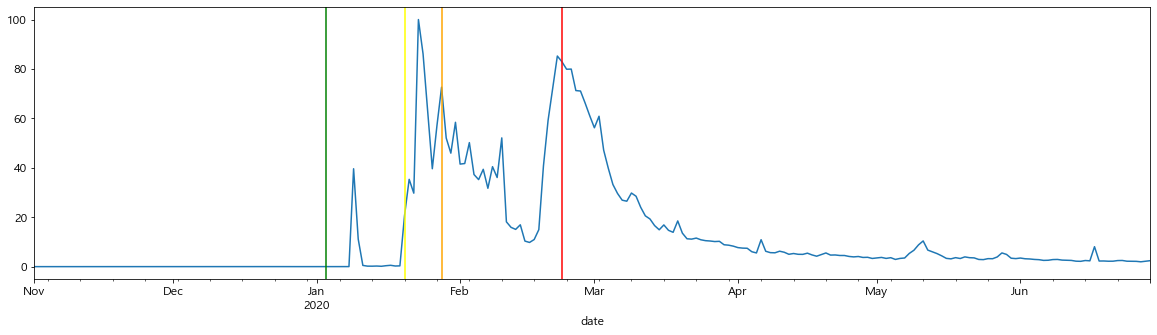

In [141]:
trend['coronavirus'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

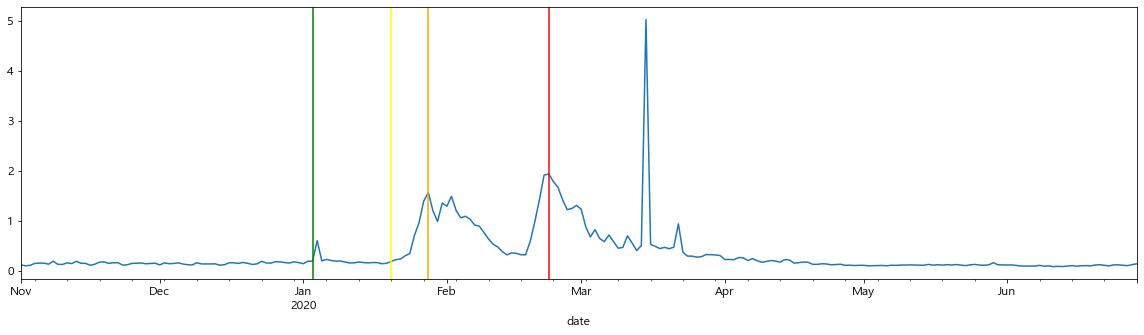

In [142]:
trend['cold'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

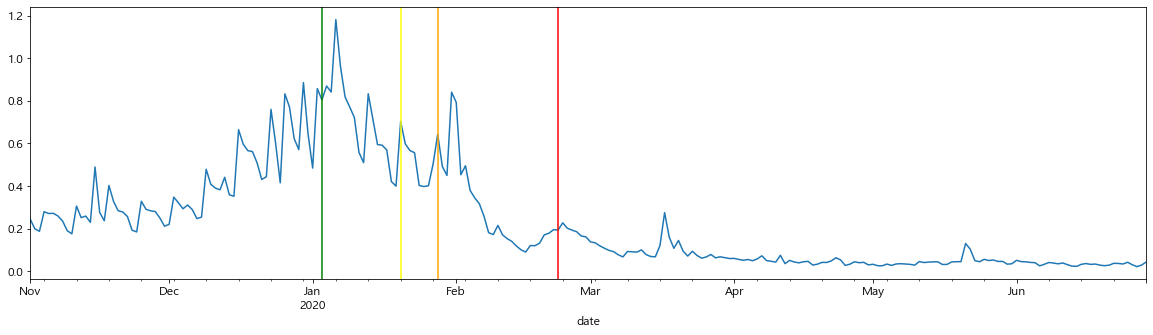

In [143]:
trend['flu'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

search trend 간의 상관계수(corr) 확인하기

In [144]:
trend.corr()

,cold,flu,pneumonia,coronavirus,T/F
cold,1.000000,0.067614,0.218791,0.684278,NaN
flu,0.067614,1.000000,0.429369,0.065522,NaN
pneumonia,0.218791,0.429369,1.000000,0.412048,NaN
coronavirus,0.684278,0.065522,0.412048,1.000000,NaN
T/F,NaN,NaN,NaN,NaN,NaN


누적 확진자 수가 기록된 Time.csv 파일 불러오기

In [145]:
confirmed = pd.read_csv('./KT_data_20200717/COVID_19/Time.csv', usecols = ['date', 'confirmed'])
confirmed.head()

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


누적 확진자 수 데이터에서 일일 확진자 수 데이터 구하기

In [146]:
confirmed=confirmed.sort_values(['date'],ascending=False)
confirmed=confirmed.reset_index()
confirmed=confirmed.drop(['index'],axis=1)

dict_case=[]
for i in range(len(confirmed)-1):
    dict_case.append(confirmed['confirmed'][i]-confirmed['confirmed'][i+1])
dict_case.append(1)

confirmed['daily']=dict_case
confirmed=confirmed.sort_values(['date'],ascending=True)
confirmed=confirmed.reset_index()
confirmede=confirmed.drop(['index'],axis=1)
confirmed.head()

,index,date,confirmed,daily
0,162,2020-01-20,1,1
1,161,2020-01-21,1,0
2,160,2020-01-22,1,0
3,159,2020-01-23,1,0
4,158,2020-01-24,2,1


In [147]:
type(confirmed['date'][0])

str

In [148]:
confirmed['date'] = pd.to_datetime(confirmed['date'])
type(confirmed['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [149]:
confirmed.index = confirmed['date']
confirmed.head()

,index,date,confirmed,daily
date,,,,
2020-01-20,162,2020-01-20,1,1
2020-01-21,161,2020-01-21,1,0
2020-01-22,160,2020-01-22,1,0
2020-01-23,159,2020-01-23,1,0
2020-01-24,158,2020-01-24,2,1


일일 확진자 시각화

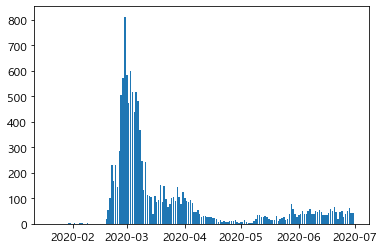

In [150]:
plt.bar(confirmed['date'], confirmed['daily'])
plt.rcParams['figure.figsize'] = [20,1]
plt.show()

In [151]:
new = pd.merge(confirmed, trend, left_index = True, right_index = True)
new.head()

,index,date_x,confirmed,daily,date_y,cold,flu,pneumonia,coronavirus,T/F
date,,,,,,,,,,
2020-01-20,162,2020-01-20,1,1,2020-01-20,0.19217,0.70343,3.63716,20.69610,True
2020-01-21,161,2020-01-21,1,0,2020-01-21,0.22462,0.59789,4.31987,35.33284,True
2020-01-22,160,2020-01-22,1,0,2020-01-22,0.23808,0.56661,3.66416,29.74474,True
2020-01-23,159,2020-01-23,1,0,2020-01-23,0.30308,0.55625,3.18035,100.00000,True
2020-01-24,158,2020-01-24,2,1,2020-01-24,0.34689,0.40226,2.48156,86.11541,True


In [152]:
new['daily'].corr(new['coronavirus'])

0.4085281663390897

## 결론: searchtrend와 정책 격상과의 관계-> 격상 당시에는 증가하지만, 그 이후로는 익숙해져 searchtrend가 급격히 감소한다. <br> 또한 searchtrend는 일일 확진자 수와 양의 상관관계를 보인다.

# 가설1. 배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.

In [153]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


### 1) 주 단위로 평균량 시각화
* delivery 데이터에서 데이터 순서를 나타내는 'SERIAL_NUMBER' 데이터를 이용해 배달 주문량을 계산
* 'SERIAL_NUMBER'를 주 단위로 count하여 시각화함

In [160]:
#주 단위로 count 하기 (배달 주문량)

delivery['date'] = pd.to_datetime(delivery['PROCESS_DT'])
delivery['date'] = delivery['date'].apply( lambda delivery: datetime(year=delivery.year, month=delivery.month, day=delivery.day))
delivery.set_index('date',inplace=True)

delivery_weekly_count = delivery.resample('W').count()

delivery_weekly_count.SERIAL_NUMBER

date
2020-01-05    139868
2020-01-12    211683
2020-01-19    186225
2020-01-26    157549
2020-02-02    201385
2020-02-09    218639
2020-02-16    203830
2020-02-23    213952
2020-03-01    226161
2020-03-08    218703
2020-03-15    227710
2020-03-22    216040
2020-03-29    214838
2020-04-05    224843
2020-04-12    215261
2020-04-19    235045
2020-04-26    227818
2020-05-03    218866
2020-05-10    244962
2020-05-17    239050
2020-05-24    207129
2020-05-31    232395
2020-06-07    231228
2020-06-14    159244
2020-06-21     85900
Freq: W-SUN, Name: SERIAL_NUMBER, dtype: int64

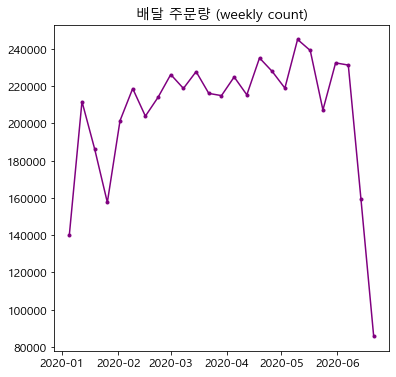

In [161]:
#주문량 시각화 (weekly count)

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(delivery_weekly_count['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (weekly count)', fontsize = 14)
plt.show()

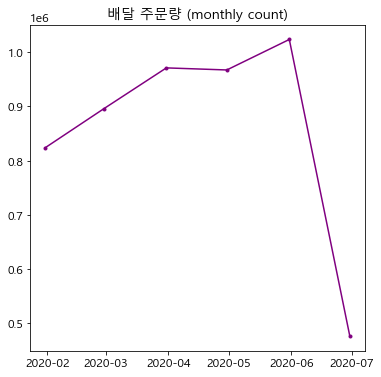

In [162]:
delivery_monthly_count = delivery.resample('M').count()

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(delivery_monthly_count['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (monthly count)', fontsize = 14)
plt.show()

- 결과
    * 4월까지 증가 & 5월에서 6월까지 증가

### 2) 수수료 & 배달비 증가 시각화

In [163]:
#수수료 & 배달비 

delivery[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]].head(10)

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
date,,
2020-01-01,4290,300
2020-01-01,4800,200
2020-01-01,3300,300
2020-01-01,4500,300
2020-01-01,6500,300
2020-01-01,3500,200
2020-01-01,3800,300
2020-01-01,3500,200
2020-01-01,4800,200


- 월 별로 배달비 & 수수료의 변화 추세를 시각화 (평균값)

In [164]:
#월 단위로 평균값 계산
delivery_weekly_avg = delivery.resample('W').mean()
delivery_monthly_avg = delivery.resample('M').mean()

delivery_monthly_avg[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]]

,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT
date,,
2020-01-31,3630.214523,260.706505
2020-02-29,3620.551579,262.544649
2020-03-31,3628.074970,268.705586
2020-04-30,3690.031827,272.418702
2020-05-31,3686.859705,269.078660
2020-06-30,3676.117379,268.086023


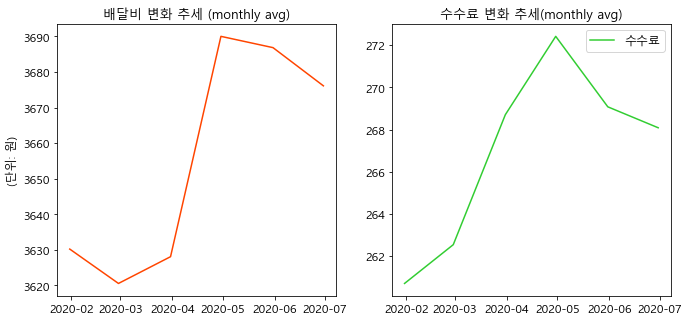

In [165]:
# 시간에 따른 수수료 & 배달비 변화 시각화 -> monthly

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

delivery_monthly_avg = delivery.resample('M').mean()

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(delivery_monthly_avg["DLVR_AMOUNT"], c="orangered", linestyle="-")
ax[1].plot(delivery_monthly_avg["CALL_RLAY_FEE_AMOUNT"],color="limegreen", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (monthly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(monthly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

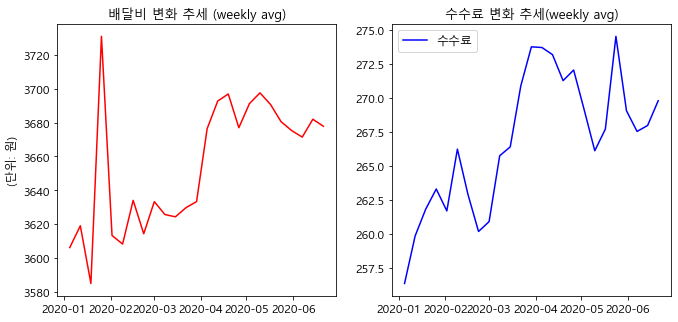

In [166]:
#weekly average

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(delivery_weekly_avg["DLVR_AMOUNT"], c="r", linestyle="-")
ax[1].plot(delivery_weekly_avg["CALL_RLAY_FEE_AMOUNT"],color="b", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (weekly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(weekly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

##### -> weekly average 는 기복이 있었고  montly average로 봤을 때는 흐름을 어느 정도 읽을 수 있었다.

In [167]:
#주문량과 배달비와의 상관계수 -> weekly

delivery_weekly_avg.DLVR_AMOUNT.corr(delivery_weekly_count.SERIAL_NUMBER)

0.026235425791629224

In [168]:
#주문량과 배달비와의 상관계수 -> monthly

delivery_monthly_avg.DLVR_AMOUNT.corr(delivery_monthly_count.SERIAL_NUMBER)

-0.0763010208551199

In [169]:
#주문량과 수수료와의 상관계수 -> weekly
            
delivery_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_weekly_count.SERIAL_NUMBER)

0.22971173277920423

In [170]:
#주문량과 수수료와의 상관계수 -> monthly

delivery_monthly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_monthly_count.SERIAL_NUMBER)

0.17238298687565023

In [171]:
#배달비와 수수료의 상관계수 -> weekly

delivery_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_weekly_count.DLVR_AMOUNT)

0.22971173277920423

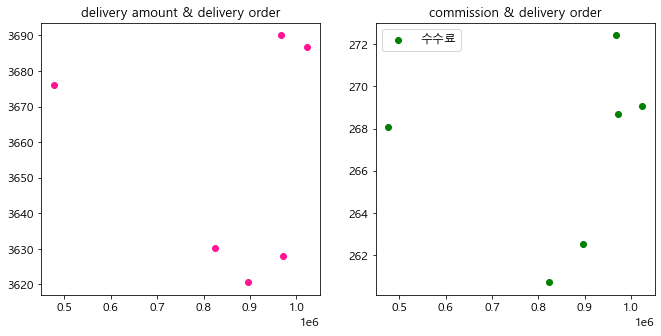

In [172]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> monthly

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(delivery_monthly_count["SERIAL_NUMBER"], delivery_monthly_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(delivery_monthly_count["SERIAL_NUMBER"],delivery_monthly_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

In [173]:
#주문량과 배달비와의 상관계수 -> monthly

delivery_monthly_avg.DLVR_AMOUNT.corr(delivery_monthly_count.SERIAL_NUMBER)

-0.0763010208551199

In [174]:
#주문량과 수수료와의 상관계수 -> monthly

delivery_monthly_count.SERIAL_NUMBER.corr(delivery_monthly_avg.CALL_RLAY_FEE_AMOUNT)

0.17238298687565023

- 역시 상관계수를 봐도 관계성이 없음을 알 수 있다.

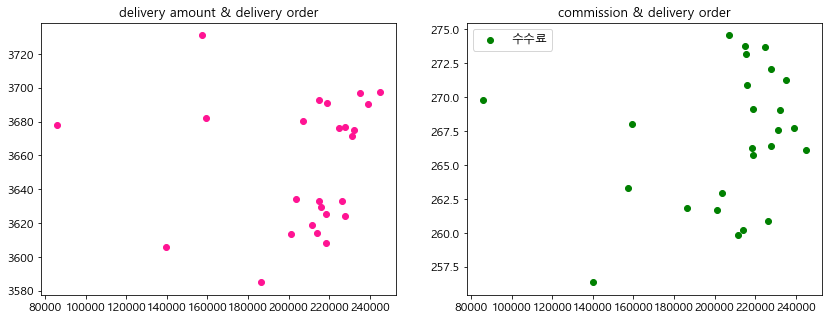

In [175]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> weekly

fig = plt.figure()
fig.set_size_inches(14,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(delivery_weekly_count["SERIAL_NUMBER"], delivery_weekly_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(delivery_weekly_count["SERIAL_NUMBER"],delivery_weekly_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- weekly 그래프 봤을 때, 주문량과 배달비 그래프가 200000건 이후로 기울기가 급한 선형적인 흐름을 어느 정도 확인할 수 있었다.

In [176]:
#주문량과 수수료와의 상관계수 -> weekly

delivery_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_weekly_count.SERIAL_NUMBER)

0.22971173277920423

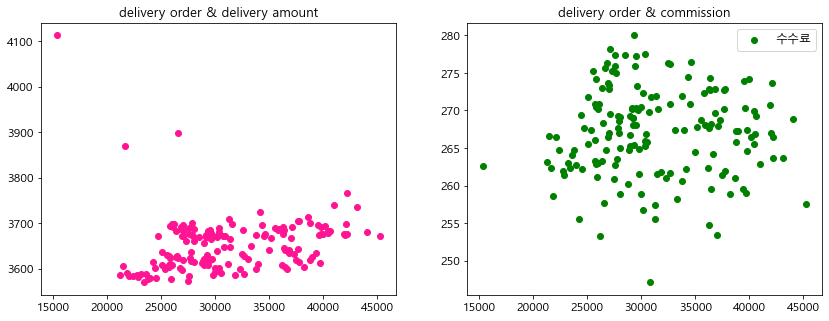

In [177]:
#일 단위로 계산

delivery_daily_avg = delivery.resample('D').mean()
delivery_daily_count = delivery.resample('D').count()

#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> daily

fig = plt.figure()
fig.set_size_inches(14,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(delivery_daily_count["SERIAL_NUMBER"],delivery_daily_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(delivery_daily_count["SERIAL_NUMBER"],delivery_daily_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery order & delivery amount",fontsize="13")
ax[1].set_title("delivery order & commission",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- daily로 시각화 했을 때, 주문량 & 배달비 그래프는 상관관계가 있음을 확실히 알 수 있지만 주문량 & 수수료 그래프는 선형보다 원 모양에 근접하므로 관계성이 거의 없다고 볼 수 있다.

In [178]:
#주문량과 배달비와의 상관계수 -> daily

delivery_daily_avg.DLVR_AMOUNT.corr(delivery_daily_count.SERIAL_NUMBER)

0.12708551776639143

* 하지만 상관계수를 봤을 때 크게 관련성이 없는 것으로 보인다.

In [179]:
#주문량과 배달비와의 상관계수 -> daily

delivery_daily_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_daily_count.SERIAL_NUMBER)

0.016232295582184576

#### <결과>
  - 여러가지 경우에 따라 시각화를 해봤지만 일정한 패턴을 보이지 않는 것으로 보아 가설 1은 틀렸다.

#  가설2: 코로나 확진자가 증가하는 시기에 바디/헤어 용품의 소비율은 감소할 것이다.

-  결과:
   -  배달비와 수수료는 2020년 4월 즈음, 급격하게 증가한 상황을 알 수 있다.
  
   >  배달 주문량의 증가와 배달비 및 수수료의 증가가 서로 연관되어 있다고 추측하였고 
둘의 상관관계가 실제로 존재하는지 확인해보도록 하자.

base_ymd column에서 데이터 출력 방식 정하기

In [180]:
#base_ymd 컬럼에서 데이터 출력 방식 정하기
fpopl['base_ymd'] = fpopl['base_ymd'].astype(str)
fpopl['base_ymd'] = fpopl['base_ymd'].apply(lambda x : x[:4] + '-' + x[4:6] + '-' +x[-2:])
fpopl['base_ymd'] = pd.to_datetime(fpopl['base_ymd'])

fpopl['month'] = pd.to_datetime(fpopl['base_ymd']).dt.month
fpopl['year'] = pd.to_datetime(fpopl['base_ymd']).dt.year

fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,month,year
0,2020-01-01,0,M,age_00,11650560,15,1,2020
1,2020-01-01,0,M,age_00,11590620,6,1,2020
2,2020-01-01,0,M,age_00,11560710,4,1,2020
3,2020-01-01,0,M,age_00,11470680,12,1,2020
4,2020-01-01,0,M,age_00,11350665,6,1,2020


In [181]:
#월 별 count
#fpopl_month_count = fpopl.resample('W').count()

ingusu =  fpopl.groupby("month")["popltn_cascnt"].mean()
ingusu

month
1    194.528952
2    185.284548
3    171.946085
4    183.174342
5    190.919584
6    201.122659
Name: popltn_cascnt, dtype: float64

Text(0, 0.5, '유동 인구')

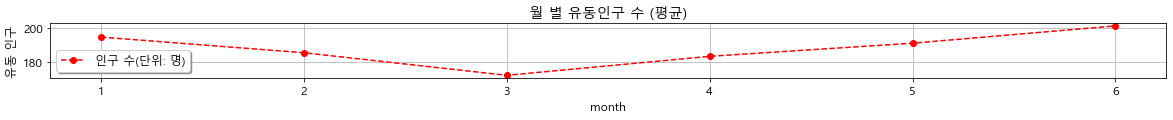

In [182]:
#월 별로 유동인구 수 비교

ingusu.plot(x="month", y="popltn_cascnt", c="r", linestyle="dashed", marker='o', label='인구 수(단위: 명)')
plt.grid(True, c=".7")
plt.title("월 별 유동인구 수 (평균)")
plt.legend(shadow=True)
plt.xlabel("month")
plt.ylabel("유동 인구")

전국적으로 3월달 까지는 인구 수가 줄어들다가 3월 이후로 증가함을 알 수 있다.

* 시간에 따른 바디, 헤어 용품 구매율 변화 시각화

In [183]:
index['period'] = index['period'].astype(str)
index['period'] = index['period'].apply(lambda x : x[:4] + '-' + x[-2:])
index['period'] = pd.to_datetime(index['period'])
index['month'] = pd.to_datetime(index['period']).dt.month
index['year'] = pd.to_datetime(index['period']).dt.year

index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi,month,year
0,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,1,2019
1,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,1,2019
2,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,1,2019
3,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,1,2019
4,2019-01-01,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,1,2019


In [184]:
# catm 컬럼의 유일한 값 추출

index['catm'].unique()

array(['건강관리용품', '가공식품', '기호식품', '담배', '빙과류', '빵류', '신선식품', '유제품류', '음료',
       '제과류', '주류', '생활용품', '애완동물용품', '기타화장품', '바디/헤어용품', '뷰티소품', '화장품'],
      dtype=object)

In [185]:
# 월 별로 바디/헤어용품을 얼마나 소비하는지 count

grouped = index.groupby("catm")
df = grouped.get_group("바디/헤어용품")
df.head()

,period,catl,catm,age,gender,sido,sigungu,cgi,month,year
275,2019-01-01,화장품,바디/헤어용품,20,F,서울,all,113.304424,1,2019
276,2019-01-01,화장품,바디/헤어용품,20,F,서울,강서구,99.919991,1,2019
277,2019-01-01,화장품,바디/헤어용품,20,F,서울,광진구,127.768558,1,2019
278,2019-01-01,화장품,바디/헤어용품,20,F,서울,양천구,50.103144,1,2019
279,2019-01-01,화장품,바디/헤어용품,20,F,서울,영등포구,101.369395,1,2019


In [186]:
df_cgi = df[df['year']==2020].groupby('month')['cgi'].mean()

df_cgi

month
1    118.893374
2     74.402123
3     63.998689
4     59.790025
5     58.451246
Name: cgi, dtype: float64

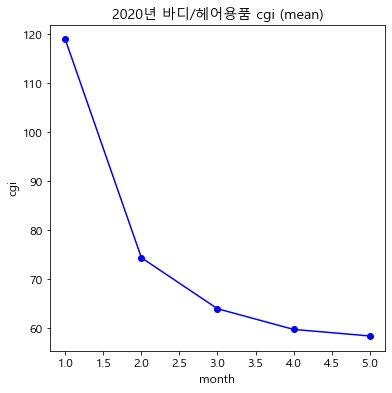

In [187]:
# 바디/헤어용품 소비지수 변화 시각화

fig = plt.figure()
fig.set_size_inches(6, 6)
df_cgi.plot(x="month", y="cgi", c="b", linestyle="-", marker='o', label='2020년 바디/헤어용품 cgi')
plt.ylabel("cgi")
plt.title('2020년 바디/헤어용품 cgi (mean)', fontsize = 14)
plt.show()

In [188]:
#성별에 따른 바디/헤어용품 소비율 비교
df_pv = df.pivot_table(['cgi'],index = ['year', 'month'], columns = index.gender)
df_pv


#sns.lineplot(x="month", y="cgi", hue="gender", data=df_pv)

cgi                        
gender               F           M         all
year month                                    
2019 1       99.852394  177.833831  119.266960
     2       79.520937   82.655915   77.091986
     3       88.050951   86.950518   84.635911
     4       82.114495   95.746497   83.673960
     5       92.253113   88.547466   87.891688
     6       86.254702   89.126335   83.095554
     7       86.014898   87.198607   83.251221
     8      101.953049  116.702715  102.758154
     9      107.747123  121.549178  106.219268
     10      77.367475   78.366946   73.971383
     11      79.329492   81.261153   76.611822
     12      87.338990   84.540176   83.797945
2020 1      118.054075  123.865981  114.749306
     2       75.620223   74.872027   72.714119
     3       65.017829   64.971704   62.019010
     4       61.576830   58.705164   59.088080
     5       59.354633   59.200751   56.807961

<AxesSubplot:xlabel='year,month'>

<Figure size 864x864 with 0 Axes>

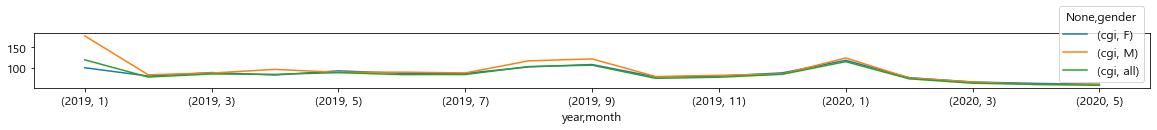

In [189]:
fig = plt.figure()
fig.set_size_inches(12, 12)
df_pv.plot()